In [2]:


import astropy
print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes
from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
print('reproject',reproject.__version__)
import spectral_cube
print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
from matplotlib.patches import Rectangle
#%matplotlib widget

astropy 5.1.dev153+gb740594dc
reproject 0.8
spectral_cube 0.6.1.dev22+g003ef16


In [3]:

Names = np.load("Names_CMZ.npy")


CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0","CO_3_2"]


NGCNames = np.load("Names.npy")


#ONGCR = [NGCRNames[9],NGCRNames[10],NGCRNames[8],NGCRNames[5]]
#ONGCS = [NGCSNames[9],NGCSNames[10],NGCSNames[8],NGCSNames[5]]
NGCNamesMols = [NGCNames[0],NGCNames[1],NGCNames[2],NGCNames[5],NGCNames[3]]
print(Names,NGCNamesMols)



Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")

SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

SpRes= np.load("CZM_Spres.npy")
NSpRes = np.load("NGC_Spres.npy")

#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(60,60))


for i in range(0,5):
    #make minimum space line
    resses = [4.3,3,5,3,3]
    
    pixel_res=np.array(resses)/5    
    ysp=2#SpecRes[i]
    xsp=SpRes[i]*np.sqrt(Bars[i])#SpRes[i]
    Nysp=2#NSpecRes[i]
    spe_resses = [3.3,2.5,2.5,2.5,2.5]
    
    
    
        
    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]

    
    Nminsigs=[]
    zeros=[]
    
    rs=np.linspace(0.01,5,100)
    
    for t in range(100):
        '''
        pix res
        vel res
        beam size = 3pc
        min requ = 29*3= pixbeam*3
        '''
        try:
            #Nminsigs.append((np.roots([rs[t]**2,-2.5*3*(resses[i]/5/2*1.13309)**2])[0])) #Solve for the minimum sigma value for a given radius
            #Nminsigs.append((np.roots([rs[t],-2.5*3*resses[i]/2*1.13309])[0])) #Solve for the minimum sigma value for a given radius
            #Nminsigs.append((29*3-(rs[t]/resses[i]*5)**2)*2.5)
            
            #Half of the velocity range seems to be that maximum dispersion for a structure
            
            Nminsigs.append((np.roots([rs[t]**2,-(spe_resses[i])/2*3*pixel_res[i]**2])[0])) #Solve for the minimum sigma value for a given radius
            
            #print(rs[t],resses[i],((rs[t]/resses[i]*5)**2)*2.5)
            #Nminsigs.append(np.sqrt(2.5)*3*(resses[i]**2*1.13309)/2/rs[t]**2) #Solve for the minimum sigma value for a given radius
            #Nminsigs.append(np.sqrt((25*1.13309*3/2 - (rs[t]*2)**2/pixel_res[i]**2)*2.5)) #Solve for the minimum sigma value for a given radius
            #print((np.sqrt((25*1.13309*3/2 - (rs[t]*2)**2/pixel_res[i]**2)*2.5)))
        except:
            
        
            Nminsigs.append(-1)
        
        
        
        line.append(rs[t])
        zeros.append(-1)
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"
    
    NGCrname=NGCNamesMols[i]+"Radii"
    NGCsname=NGCNamesMols[i]+"Sigmas"
    print(rname,NGCrname)
    #radsBase = np.load(rname,allow_pickle=True)*10**6#pc
    #radsBase = np.load(rname)*10**6#pc
    radsBase=[[],[]]
    radsBase[0] = np.genfromtxt(rname+"_Leaves")*10**6#pc
    radsBase[1] = np.genfromtxt(rname+"_Branches")*10**6#pc
    
    #print(radsBase,np.shape(radsBase))

    
    
    
    sigsBase=[[],[]]
    sigsBase[0] = np.genfromtxt(sname+"_Leaves")#km/s
    sigsBase[1] = np.genfromtxt(sname+"_Branches")

    #Shetty leaves/branches
    radsBaseSh=[[],[]]
    radsBaseSh[0] = np.genfromtxt(rname+"Sh_Leaves")*10**6#pc
    radsBaseSh[1] = np.genfromtxt(rname+"Sh_Branches")*10**6#pc
    #Shetty leaves/branches
    sigsBaseSh=[[],[]]
    sigsBaseSh[0] = np.genfromtxt(sname+"Sh_Leaves")#km/s
    sigsBaseSh[1] = np.genfromtxt(sname+"Sh_Branches")

    #Shetty's method
    radsSh,sigsSh=np.concatenate((radsBaseSh[0],radsBaseSh[1])), np.concatenate((sigsBaseSh[0],sigsBaseSh[1]))
    #
    
    radsNGCBase=[[],[]]
    radsNGCBase[0] = np.genfromtxt(NGCrname+"_Leaves")*10**6#km/s
    radsNGCBase[1] = np.genfromtxt(NGCrname+"_Branches")*10**6
    
    sigsNGCBase=[[],[]]
    sigsNGCBase[0] = np.genfromtxt(NGCsname+"_Leaves")#km/s
    sigsNGCBase[1] = np.genfromtxt(NGCsname+"_Branches")
    
    
    radsNGCL=radsNGCBase[0]
    radsNGCB=radsNGCBase[1]
    sigsNGCL=sigsNGCBase[0]
    sigsNGCB=sigsNGCBase[1]
    
    radsL=radsBase[0]
    radsB=radsBase[1]
    sigsL=sigsBase[0]
    sigsB=sigsBase[1]
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,radsB)), np.concatenate((sigsL,sigsB))
    
    #print(radsNGCBase,sigsNGCBase)
    #LuminBase = np.load(Names[i]+"_Luminosities.npy",allow_pickle=True)
    
    LuminBase=[[],[]]
    LuminBase[0] = np.genfromtxt(Names[i]+"_Luminosities"+"_Leaves")#km/s
    LuminBase[1] = np.genfromtxt(Names[i]+"_Luminosities"+"_Branches")
    
    Lumin = np.concatenate((LuminBase[0],LuminBase[1]))#Take up less ram
    
    
    LuminNGCBase=[[],[]]
    LuminNGCBase[0] = np.genfromtxt(NGCNamesMols[i]+"_Luminosities"+"_Leaves")#km/s
    LuminNGCBase[1] = np.genfromtxt(NGCNamesMols[i]+"_Luminosities"+"_Branches")
    
    
    LuminNGC = np.concatenate((LuminNGCBase[0],LuminNGCBase[1]))#Take up less ram
    
    
    
    ColumnBase=[[],[]]
    ColumnBase[0] = np.genfromtxt(Names[i]+"_Column"+"_Leaves")#km/s
    ColumnBase[1] = np.genfromtxt(Names[i]+"_Column"+"_Branches")
    
    Column = np.concatenate((ColumnBase[0],ColumnBase[1]))#Take up less ram
    
    ColumnNGCBase=[[],[]]
    ColumnNGCBase[0] = np.genfromtxt(NGCNamesMols[i]+"_Column"+"_Leaves")#km/s
    ColumnNGCBase[1] = np.genfromtxt(NGCNamesMols[i]+"_Column"+"_Branches")
        
    ColumnNGC = np.concatenate((ColumnNGCBase[0],ColumnNGCBase[1]))#Take up less ram
    
    
    Flux = np.genfromtxt(Names[i]+"Flux_Dense")#Take up less ram
    FluxNGC = np.genfromtxt(NGCNamesMols[i]+"Flux_Dense")#Take up less ram
    
    RGPFF = np.genfromtxt(Names[i]+"Rad_For_Flux")#Take up less ram
    RGPFFNGC = np.genfromtxt(NGCNamesMols[i]+"Rad_For_Flux")#Take up less ram
    
    
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
    (popt2, pcov2),(poptT, pcovT) =(curve_fit(func, radsB, sigsB)),(curve_fit(func, rads,sigs))
    
    try:
        (popt, pcov) = (curve_fit(func, radsL, sigsL))
    except:
        (popt, pcov) = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    (Npopt2, Npcov2),(NpoptT, NpcovT) = (curve_fit(func, radsNGCB, sigsNGCB)),(curve_fit(func, radsNGC,sigsNGC ))
    
    (poptTSh, pcovTSh) =(curve_fit(func, radsSh,sigsSh))
    try:
        (Npopt, Npcov) = (curve_fit(func, radsNGCL, sigsNGCL))
    except:
        (Npopt, Npcov) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    print( np.shape(radsNGC))
    print( np.shape(LuminNGC))
    gp = np.where(LuminNGC>0)
    Nlgp = LuminNGC[gp]
    Nradgp = radsNGC[gp]
    
    try:
        
        (NpoptLum, NpcovLum)  = curve_fit(func, np.array(Nradgp,dtype='float64'),np.array(Nlgp,dtype='float64'),maxfev=9999999,p0 = np.array([10**25,2],dtype='float64'),ftol = 10**-13)
    except:
        (NpoptLum, NpcovLum) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    try:
        gp = np.where(Lumin>0)
        lgp = Lumin[gp]
        radgp = rads[gp]
        (poptLum, pcovLum)  = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**25,2],dtype='float64'),ftol = 10**-13)

    except:
        (poptLum, pcovLum) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    try:
        gp2 = np.where(Column>0)
        cgp = Column[gp2]
        rgp=sigs[gp2]**2/rads[gp2]
        (poptCD, pcovCD) = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
    except:
        (poptCD, pcovCD) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    try:
        gp2 = np.where(ColumnNGC>0)
        Ncgp = ColumnNGC[gp2]
        Nrgp=sigsNGC[gp2]**2/radsNGC[gp2]
        (NpoptCD, NpcovCD) = curve_fit(func, np.array(Ncgp,dtype='float64') ,np.array(Nrgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
    except:
        (NpoptCD, NpcovCD) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
           
    
    
    
    axA = pylab.subplot(8,6, i+1)
    axL = pylab.subplot(8,6, i+6)
    axB = pylab.subplot(8,6, i+11)
    
    axNM = pylab.subplot(8,6, i+16)
    
    axLum = pylab.subplot(8,6, i+21)
    axCol = pylab.subplot(8,6, i+26)
    axFlux = pylab.subplot(8,6, i+31)
    axSh = pylab.subplot(9,7, i+36)
    
    
    #Lum and CD Both
    xsLS = axLum.scatter(radgp, lgp,c="darkblue",alpha=.9,label=("CMZ_All"+CMZLs[i]),marker='s',s=10,facecolors='Dark Blue')
    NxsLS = axLum.scatter(Nradgp, Nlgp,c="darkred",alpha=.9,label=("NGC_All"+CMZLs[i]),marker='o',s=10,facecolors='Dark Blue')
    
    #xsCD = axCol.scatter(cgp,rgp,c="darkgreen",alpha=.9,label=("CMZ_All"+CMZLs[i]),marker='s',s=10,facecolors='Dark Blue')
    #NxsCD = axCol.scatter(Ncgp,Nrgp,c="darkkhaki",alpha=.9,label=("NGC_All"+CMZLs[i]),marker='o',s=10,facecolors='Dark Blue')
    
    
    xs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    
    er_r=2
    yusLum  = func(xs, poptLum[0]+np.sqrt(pcovLum[0][0])*er_r,poptLum[1]+np.sqrt(pcovLum[1][1])*er_r)
    ylsLum  = func(xs, poptLum[0]-np.sqrt(pcovLum[0][0])*er_r,poptLum[1]-np.sqrt(pcovLum[1][1])*er_r)
    xpaFLum = axLum.fill_between(xs,ylsLum,yusLum,color="darkblue",alpha=.4)
    xpaLum = axLum.plot(xs,func(xs, poptLum[0],poptLum[1]),color="darkblue",alpha=1)
    
    NyusLum  = func(Nxs, NpoptLum[0]+np.sqrt(NpcovLum[0][0])*er_r,NpoptLum[1]+np.sqrt(NpcovLum[1][1])*er_r)
    NylsLum  = func(Nxs, NpoptLum[0]-np.sqrt(NpcovLum[0][0])*er_r,NpoptLum[1]-np.sqrt(NpcovLum[1][1])*er_r)
    NxpaFLum = axLum.fill_between(Nxs,NylsLum,NyusLum,color="darkred",alpha=.4)
    NxpaLum = axLum.plot(Nxs,func(Nxs, NpoptLum[0],NpoptLum[1]),color="darkred",alpha=1)
    
    ######################
    ##Cd
    
    
    
    #bw = (np.nanmax(cgp)-np.nanmin(cgp))/100
    #bins = np.linspace(np.nanmin(cgp),np.nanmax(cgp),100)
    bins = np.logspace(np.log10(np.nanmin(cgp)),np.log10(np.nanmax(cgp)),15)
    #numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)
    print(np.shape(bins))
    Bin_SL=[]
    SL_err=[]
    Bin_CD=[]
    
    NBin_SL=[]
    NSL_err=[]
    NBin_CD=[]
    
    for lmi in range(len(bins)-1):
        SLBin=[]
        for lmj in range(len(cgp)):
            if(cgp[lmj]>bins[lmi] and cgp[lmj]<bins[lmi+1]):
                SLBin.append(rgp[lmj])
        if(str(np.nanmean(SLBin))!=str(np.nan) and str(np.nanmean(SLBin))!= str(np.inf)):
            Bin_SL.append(np.nanmean(SLBin))
            SL_err.append(np.nanstd(SLBin))
        else:
            Bin_SL.append(np.nan)
            SL_err.append(np.nan)
    #Nbins = np.linspace(np.nanmin(Ncgp),np.nanmax(Ncgp),int((np.nanmax(Ncgp)-np.nanmin(Ncgp))/bw))
    Nbins = np.logspace(np.log10(np.nanmin(Ncgp)),np.log10(np.nanmax(Ncgp)),15)
    for lmi in range(len(Nbins)-1):
        SLBin=[]
        for lmj in range(len(Ncgp)):
            if(Ncgp[lmj]>Nbins[lmi] and Ncgp[lmj]<Nbins[lmi+1]):
                SLBin.append(Nrgp[lmj])
        if(str(np.nanmean(SLBin))!=str(np.nan) and str(np.nanmean(SLBin))!= str(np.inf)):
            NBin_SL.append(np.nanmean(SLBin))
            NSL_err.append(np.nanstd(SLBin))
        else:
            NBin_SL.append(np.nan)
            NSL_err.append(np.nan)
    #print("M",bins,Nbins,Bin_SL,NBin_SL)
    #width = bw
    er_r = 1
    from matplotlib.patches import Rectangle
    bw = (bins[0+1]-bins[0])
    xp1BinC = axCol.plot([bins[0],bins[1]], [Bin_SL[0],Bin_SL[0]],c="darkgreen",alpha=1,label=("CMZ"+CMZLs[i]))
    for w in range(len(bins)-1):
        bw = (bins[w+1]-bins[w])
        xp1BinC = axCol.plot([bins[w],bins[w+1]], [Bin_SL[w],Bin_SL[w]],c="darkgreen",alpha=1)
        #err_tipsC = axCol.plot([bins[w]-bw/2,bins[w]+bw/2], [Bin_SL[w]+SL_err[w]*er_r,Bin_SL[w]+SL_err[w]*er_r],c="darkgreen",alpha=1)
        #err_tupsC = axCol.plot([bins[w]-bw/2,bins[w]+bw/2], [Bin_SL[w]-SL_err[w]*er_r,Bin_SL[w]-SL_err[w]*er_r],c="darkgreen",alpha=1)
        axCol.add_patch(Rectangle(
            xy=(bins[w], Bin_SL[w]-SL_err[w]*er_r) ,width=bw, height=SL_err[w]*er_r*2,
            linewidth=1, color='darkgreen', fill=True,alpha=.2,))
    
    bw = (Nbins[0+1]-Nbins[0])
    Nxp1BinC = axCol.plot([Nbins[0],Nbins[1]], [NBin_SL[0],NBin_SL[0]],c="darkkhaki",alpha=1,label=("NGC"+CMZLs[i]))
    for w in range(len(Nbins)-1):
        bw = (Nbins[w+1]-Nbins[w])
        Nxp1BinC = axCol.plot([Nbins[w],Nbins[w+1]], [NBin_SL[w],NBin_SL[w]],c="darkkhaki",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axCol.add_patch(Rectangle(
            xy=(Nbins[w], NBin_SL[w]-NSL_err[w]*er_r) ,width=bw, height=NSL_err[w]*er_r*2,
            linewidth=1, color='darkkhaki', fill=True,alpha=.2,))
    er_r = 2  
        

        
    NCxs=np.linspace(np.nanmin(Ncgp),np.nanmax(Ncgp),50)
    Cxs=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
    
    yusCol  = func(Cxs, poptCD[0]+np.sqrt(pcovCD[0][0])*er_r,poptCD[1]+np.sqrt(pcovCD[1][1])*er_r)
    ylsCol  = func(Cxs, poptCD[0]-np.sqrt(pcovCD[0][0])*er_r,poptCD[1]-np.sqrt(pcovCD[1][1])*er_r)
    #xpaFCol = axCol.fill_between(Cxs,ylsCol,yusCol,color="darkgreen",alpha=.4)
    #xpaCol = axCol.plot(Cxs,func(Cxs, poptCD[0],poptCD[1]),color="darkgreen",alpha=1)
    
    NyusCol  = func(NCxs, NpoptCD[0]+np.sqrt(NpcovCD[0][0])*er_r,NpoptCD[1]+np.sqrt(NpcovCD[1][1])*er_r)
    NylsCol  = func(NCxs, NpoptCD[0]-np.sqrt(NpcovCD[0][0])*er_r,NpoptCD[1]-np.sqrt(NpcovCD[1][1])*er_r)
    #NxpaFCol = axCol.fill_between(NCxs,NylsCol,NyusCol,color="darkkhaki",alpha=.4)
    #NxpaCol = axCol.plot(NCxs,func(NCxs, NpoptCD[0],NpoptCD[1]),color="darkkhaki",alpha=1)
    
    A_vir = .1
    f=5/3
    G = 6.67408*10**-20#*u.km**3*u.kg**-1*u.s**-2# km3 kg-1 s-2
    
    pc_2_km=3.086*10**13#*u.km/u.parsec#km/pc
    
    Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2
    
    NbinsPlot = np.linspace(np.nanmin(Ncgp)*.01,np.nanmax(Ncgp)*100,100)
    
    
    s2_r=[]
    for t in range(len(NbinsPlot)):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NbinsPlot[t]*100000**2/(5/A_vir/G/f/np.pi)*pc_2_km/Num_per_kg#km^2/s^2/pc
        s2_r.append(Sig_sqr_over_R)

    axCol.plot(NbinsPlot, s2_r,c="grey",alpha=1,linestyle=':',label=("a_vir = .1"))
    
    A_vir = 1
    s2_r=[]
    for t in range(len(NbinsPlot)):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NbinsPlot[t]*100000**2/(5/A_vir/G/f/np.pi)*pc_2_km/Num_per_kg#km^2/s^2/pc
        s2_r.append(Sig_sqr_over_R)

    axCol.plot(NbinsPlot, s2_r,c="grey",alpha=1,linestyle='dashed',label=("a_vir = 1"))
    
    A_vir = 10
    s2_r=[]
    for t in range(len(NbinsPlot)):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NbinsPlot[t]*100000**2/(5/A_vir/G/f/np.pi)*pc_2_km/Num_per_kg#km^2/s^2/pc
        s2_r.append(Sig_sqr_over_R)

    axCol.plot(NbinsPlot, s2_r,c="grey",alpha=1,linestyle='dashdot',label=("a_vir = 10"))
    
    A_vir = 100
    s2_r=[]
    for t in range(len(NbinsPlot)):
        ps = 0
        #N = 5/A_vir/f/np.pi*sigma**2/R
        #sigma**2/R = N/(5/A_vir/f/np.pi)
        Sig_sqr_over_R =  NbinsPlot[t]*100000**2/(5/A_vir/G/f/np.pi)*pc_2_km/Num_per_kg#km^2/s^2/pc
        s2_r.append(Sig_sqr_over_R)

    axCol.plot(NbinsPlot, s2_r,c="grey",alpha=1,linestyle='dotted',label=("a_vir = 100"))
    
    #########
    
    #Making same thing but for flux density
    
    #########
    
    
    Flux
    FluxNGC
    RGPFF
    RGPFFNGC
    
    
    bins_FF = np.logspace(np.log10(np.nanmin(Flux)),np.log10(np.nanmax(Flux)),15)
    #numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)
    print(np.shape(bins))
    Bin_SL_FF=[]
    SL_err_FF=[]
    Bin_F=[]
    
    NBin_SL_FF=[]
    NSL_err_FF=[]
    NBin_F=[]
    for lmi in range(len(bins_FF)-1):
        SLBin=[]
        for lmj in range(len(Flux)):
            if(Flux[lmj]>bins_FF[lmi] and Flux[lmj]<bins_FF[lmi+1]):
                SLBin.append(RGPFF[lmj])
        if(str(np.nanmean(SLBin))!=str(np.nan) and str(np.nanmean(SLBin))!= str(np.inf)):
            Bin_SL_FF.append(np.nanmean(SLBin))
            SL_err_FF.append(np.nanstd(SLBin))
        else:
            Bin_SL_FF.append(np.nan)
            SL_err_FF.append(np.nan)
    #Nbins = np.linspace(np.nanmin(Ncgp),np.nanmax(Ncgp),int((np.nanmax(Ncgp)-np.nanmin(Ncgp))/bw))
    Nbins_FF = np.logspace(np.log10(np.nanmin(FluxNGC)),np.log10(np.nanmax(FluxNGC)),15)
    for lmi in range(len(Nbins_FF)-1):
        SLBin=[]
        for lmj in range(len(FluxNGC)):
            if(FluxNGC[lmj]>Nbins_FF[lmi] and FluxNGC[lmj]<Nbins_FF[lmi+1]):
                SLBin.append(RGPFFNGC[lmj])
        if(str(np.nanmean(SLBin))!=str(np.nan) and str(np.nanmean(SLBin))!= str(np.inf)):
            NBin_SL_FF.append(np.nanmean(SLBin))
            NSL_err_FF.append(np.nanstd(SLBin))
        else:
            NBin_SL_FF.append(np.nan)
            NSL_err_FF.append(np.nan)
    #print("M",bins,Nbins,Bin_SL,NBin_SL)
    #width = bw
    er_r = 1
    
    bw = (bins_FF[0+1]-bins_FF[0])
    xp1BinF = axFlux.plot([bins_FF[0],bins_FF[1]], [Bin_SL_FF[0],Bin_SL_FF[0]],c="orange",alpha=1,label=("CMZ"+CMZLs[i]))
    for w in range(len(bins_FF)-1):
        bw = (bins_FF[w+1]-bins_FF[w])
        xp1BinF = axFlux.plot([bins_FF[w],bins_FF[w+1]], [Bin_SL_FF[w],Bin_SL_FF[w]],c="orange",alpha=1)
        
        axFlux.add_patch(Rectangle(
            xy=(bins_FF[w], Bin_SL_FF[w]-SL_err_FF[w]*er_r) ,width=bw, height=SL_err_FF[w]*er_r*2,
            linewidth=1, color='orange', fill=True,alpha=.2,))
    
    bw = (Nbins_FF[0+1]-Nbins_FF[0])
    Nxp1BinF = axFlux.plot([Nbins_FF[0],Nbins_FF[1]], [NBin_SL[0],NBin_SL[0]],c="purple",alpha=1,label=("(flux/2) NGC"+CMZLs[i]))
    for w in range(len(Nbins_FF)-1):
        bw = (Nbins_FF[w+1]-Nbins_FF[w])
        Nxp1BinF = axFlux.plot([Nbins_FF[w],Nbins_FF[w+1]], [NBin_SL_FF[w],NBin_SL_FF[w]],c="purple",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axFlux.add_patch(Rectangle(
            xy=(Nbins_FF[w], NBin_SL_FF[w]-NSL_err_FF[w]*er_r) ,width=bw, height=NSL_err_FF[w]*er_r*2,
            linewidth=1, color='purple', fill=True,alpha=.2,))
    er_r = 2  
    
    
    ##########
    #print(xs,Nxs,yusLum)
    
    #leaves and branches CMZ
    xp1L = axL.scatter(radsL, sigsL,c="Cyan",alpha=.7,label=("CMZ_Leaves"+CMZLs[i]),marker='s',s=10,facecolors='none')
    xp1B = axB.scatter(radsB, sigsB,c="Purple",alpha=.7,label=("CMZ_Branches"+CMZLs[i]),marker='s',s=10,facecolors='black')
    xp1AL = axA.scatter(radsL, sigsL,c="Cyan",alpha=.7,label=("CMZ_Leaves"+CMZLs[i]),marker='s',s=10,facecolors='none')
    xp1AB = axA.scatter(radsB, sigsB,c="Purple",alpha=.7,label=("CMZ_Branches"+CMZLs[i]),marker='s',s=10,facecolors='black')
    
    
    ysL,ysB,ysT=func(xs,popt[0],popt[1]),func(xs,popt2[0],popt2[1]), func(xs,poptT[0],poptT[1])
    xpaL,xpaB,xpaT = axL.plot(xs,ysL,c='Blue',label="CMZ_Leaves"),axB.plot(xs,ysB,c='Blue',label="CMZ_Branches"),axA.plot(xs,ysT,c='Blue',label='CMZ_All')
    
    
    
    er_r=2
    yusL,yusB,yusT  = func(xs, popt[0]+np.sqrt(pcov[0][0])*er_r,popt[1]+np.sqrt(pcov[1][1])*er_r),func(xs, popt2[0]+np.sqrt(pcov2[0][0])*er_r,popt2[1]+np.sqrt(pcov2[1][1])*er_r),func(xs, poptT[0]+np.sqrt(pcovT[0][0])*er_r,poptT[1]+np.sqrt(pcovT[1][1])*er_r)
    ylsL,ylsB,ylsT  = func(xs, popt[0]-np.sqrt(pcov[0][0])*er_r,popt[1]-np.sqrt(pcov[1][1])*er_r),func(xs, popt2[0]-np.sqrt(pcov2[0][0])*er_r,popt2[1]-np.sqrt(pcov2[1][1])*er_r),func(xs, poptT[0]-np.sqrt(pcovT[0][0])*er_r,poptT[1]-np.sqrt(pcovT[1][1])*er_r)
    xpaFL,xpaFB,xpaFT = axL.fill_between(xs,ylsL,yusL,color="Blue",alpha=.4),axB.fill_between(xs,ylsB,yusB,color="Blue",alpha=.4),axA.fill_between(xs,ylsT,yusT,color="Blue",alpha=.4)
    
        
        
    er_r=1
    
    xsSh=np.linspace(np.nanmin(radsSh),np.nanmax(radsSh),50)
    yusTSh  = func(xs, poptTSh[0]+np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]+np.sqrt(pcovTSh[1][1])*er_r)
    xpaFTsh = axSh.plot(xsSh,yusTSh,color="Cyan",alpha=1,label="Shetty Method")
    xpaFT2 = axSh.plot(xs,yusT,color="Blue",alpha=1,label="Nico Method")
    xpaFTsh = axSh.scatter(radsSh,sigsSh,color="Cyan",alpha=1)
    xpaFT2 = axSh.scatter(rads,sigs,color="Blue",alpha=1)
    axSh.legend()
    
    cmzT2F = axNM.fill_between(xs,ylsT,yusT,color="Blue",alpha=.3)
    cmzT2 = axNM.plot(xs,ysT,c='Blue',label='CMZ_All')
    
    #cmzNMF = axNM.fill_between(xs,ysNM_L,ysNM_U,color="Purple",alpha=.3)
    #cmzNM = axNM.plot(xs,ysNM,c='Purple',label='Noise-modified CMZ average of 100 runs (All)')
    
    if(i==1):
        percent = 1
    else:
        percent = 1
    Nxp1L = axL.scatter(radsNGCL[0:int((len(radsNGCL)-1)*percent)], sigsNGCL[0:int((len(sigsNGCL)-1)*percent)],c="Orange",alpha=.7,label=("NGC_253_Leaves"+CMZLs[i]),marker='o',s=10,facecolors='none')
    Nxp1B = axB.scatter(radsNGCB[0:int((len(radsNGCB)-1)*percent)], sigsNGCB[0:int((len(sigsNGCB)-1)*percent)],c="Crimson",alpha=.7,label=("NGC_253_Branches"+CMZLs[i]),marker='o',s=10,facecolors='black')
    Nxp1AL = axA.scatter(radsNGCL[0:int((len(radsNGCL)-1)*percent)], sigsNGCL[0:int((len(sigsNGCL)-1)*percent)],c="Orange",alpha=.7,label=("NGC_253_Leaves"+CMZLs[i]),marker='o',s=10,facecolors='none')
    Nxp1AB = axA.scatter(radsNGCB[0:int((len(radsNGCB)-1)*percent)], sigsNGCB[0:int((len(sigsNGCB)-1)*percent)],c="Crimson",alpha=.7,label=("NGC_253_Branches"+CMZLs[i]),marker='o',s=10,facecolors='black')
    
    
    NysL,NysB,NysT=func(Nxs,Npopt[0],Npopt[1]),func(Nxs,Npopt2[0],Npopt2[1]), func(Nxs,NpoptT[0],NpoptT[1])
    NxpaL,NxpaB,NxpaT = axL.plot(Nxs,NysL,c='Red',label="NGC_Leaves"),axB.plot(Nxs,NysB,c='Red',label="NGC_Branches"),axA.plot(Nxs,NysT,c='Red',label='NGC_All')
    
    er_r=2
    NyusL,NyusB,NyusT  = func(Nxs, Npopt[0]+np.sqrt(Npcov[0][0])*er_r,Npopt[1]+np.sqrt(Npcov[1][1])*er_r),func(Nxs, Npopt2[0]+np.sqrt(Npcov2[0][0])*er_r,Npopt2[1]+np.sqrt(Npcov2[1][1])*er_r),func(Nxs, NpoptT[0]+np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]+np.sqrt(NpcovT[1][1])*er_r)
    NylsL,NylsB,NylsT  = func(Nxs, Npopt[0]-np.sqrt(Npcov[0][0])*er_r,Npopt[1]-np.sqrt(Npcov[1][1])*er_r),func(Nxs, Npopt2[0]-np.sqrt(Npcov2[0][0])*er_r,Npopt2[1]-np.sqrt(Npcov2[1][1])*er_r),func(Nxs, NpoptT[0]-np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]-np.sqrt(NpcovT[1][1])*er_r)
    NxpaFL,NxpaFB,NxpaFT = axL.fill_between(Nxs,NylsL,NyusL,color="Red",alpha=.4),axB.fill_between(Nxs,NylsB,NyusB,color="Red",alpha=.4),axA.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.4)
    
    
    ngcT2F = axNM.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.3)
    ngcT2 = axNM.plot(Nxs,NysT,c='Red',label='NGC_All')
    
    Shetty_Exp = [0.64,0.46,.78,-5,-5]
    Shetty_exp_errs = .06
    
    ShettyCoefs = [2.1,3.8,2.6,-5,-5]
    ShettyCoefsErrs = 1.2
    SP = func(Nxs,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(Nxs,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(Nxs,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    #ShettyNM = axNM.plot(Nxs,SP,c='Yellow',label='Shetty Value CMZ (CO_3_2)')
    #ShettyFill = axNM.fill_between(Nxs,SPL,SPU,color="Yellow",alpha=.2)
    
    NicoCO = .74
    NicoCOErr=.04
    NicoCO_10= 3.3
    NicoCO_10Err= .4
    
    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    def NicoAErr(Aer,b,bErr):
        return np.sqrt(Aer**2/10**(2*b)+b**2*Aer**2*bErr**2/b**(2*b+2))
    NNicoCO = .82
    NNicoCOErr=.02
    NNicoCO_10= 8.9
    NNicoCO_10Err= .2
    print(NicoCOCoef(NicoCO_10,NicoCO))
    NI = func(Nxs,NicoCOCoef(NicoCO_10,NicoCO),NicoCO)
    NIU = func(Nxs,NicoCOCoef(NicoCO_10+NicoCO_10Err*er_r,NicoCO+NicoCOErr*er_r),NicoCO+ NicoCOErr*er_r)
    NIL = func(Nxs,NicoCOCoef(NicoCO_10-NicoCO_10Err*er_r,NicoCO-NicoCOErr*er_r),NicoCO- NicoCOErr*er_r)
    
    #NicoNM = axNM.plot(Nxs,NI,c='Cyan',label='Nico CO_1-0 Values_CMZ')
    #NicoFill = axNM.fill_between(Nxs,NIL,NIU,color="Cyan",alpha=.2)
    
    NNI = func(Nxs,NicoCOCoef(NNicoCO_10,NNicoCO),NNicoCO)
    NNIU = func(Nxs,NicoCOCoef(NNicoCO_10+NNicoCO_10Err*er_r,NNicoCO+NNicoCOErr*er_r),NNicoCO+ NNicoCOErr*er_r)
    NNIL = func(Nxs,NicoCOCoef(NNicoCO_10-NNicoCO_10Err*er_r,NNicoCO-NNicoCOErr*er_r),NNicoCO- NNicoCOErr*er_r)
    
    #NNicoNM = axNM.plot(Nxs,NNI,c='Orange',label='Nico CO_1-0 Values_NGC')
    #NNicoFill = axNM.fill_between(Nxs,NNIL,NNIU,color="Orange",alpha=.2)
    
    
    
    NicoCO32 = .72
    NicoCOErr32=.03
    NicoCO_32= 8.9
    NicoCO_32Err= .2
    NNicoCO32 = .62
    NNicoCOErr32=.01
    NNicoCO_32=17.1
    NNicoCO_32Err= .01
    
    NI32 = func(Nxs,NicoCOCoef(NicoCO_32,NicoCO32),NicoCO32)
    NIU32 = func(Nxs,NicoCOCoef(NicoCO_32+NicoCO_32Err*er_r,NicoCO32+NicoCOErr32*er_r),NicoCO32+ NicoCOErr32*er_r)
    NIL32 = func(Nxs,NicoCOCoef(NicoCO_32-NicoCO_32Err*er_r,NicoCO32-NicoCOErr32*er_r),NicoCO32- NicoCOErr32*er_r)
    
    NicoNM32 = axNM.plot(Nxs,NI32,c='black',label='Nico CO_3-2 Values_CMZ')
    NicoFill32 = axNM.fill_between(Nxs,NIL32,NIU32,color="black",alpha=.2)
    
    NNI32 = func(Nxs,NicoCOCoef(NNicoCO_32,NNicoCO32),NNicoCO32)
    NNIU32 = func(Nxs,NicoCOCoef(NNicoCO_32+NNicoCO_32Err*er_r,NNicoCO32+NNicoCOErr32*er_r),NNicoCO32+ NNicoCOErr32*er_r)
    NNIL32 = func(Nxs,NicoCOCoef(NNicoCO_32-NNicoCO_32Err*er_r,NNicoCO32-NNicoCOErr32*er_r),NNicoCO32- NNicoCOErr32*er_r)
    
    NNicoNM32 = axNM.plot(Nxs,NNI32,c='green',label='Nico CO_3-2 Values_NGC')
    NNicoFill32 = axNM.fill_between(Nxs,NNIL32,NNIU32,color="green",alpha=.2)
    
    #Minimum velocity line
    MinVel1=axNM.fill_between(line,Nminsigs,zeros,color="Gray",alpha=.2)
    MinVel2=axA.fill_between(line,Nminsigs,zeros,color="Gray",alpha=.2)
    
    
    
    vol_thresh = [[[np.nan,np.nan],[np.nan,np.nan]],[[np.nan,np.nan],[np.nan,np.nan]],[[np.nan,np.nan],[np.nan,np.nan]],[[np.nan,np.nan],[np.nan,np.nan]],[[2.4e0*np.sqrt(3)/1.13309,1e-1*np.sqrt(3)/1.13309],[2e-1*np.sqrt(3)/1.13309,9e0*np.sqrt(3)/1.13309]],]
    vth = vol_thresh[i]
    #1-0 ,[[3e1,1e-1],[6e-1,3e2]]
    axA.fill_between([vth[0][0],vth[1][0]],[vth[0][1],vth[1][1]], [vth[0][1],vth[0][1]], facecolor='lightgrey', edgecolor=None, alpha=0.5, zorder=1)
    axA.plot([vth[0][0],vth[1][0]],[vth[0][1],vth[1][1]], ls='-', color='darkgrey', alpha=0.5, zorder=1)
        
    
    
    axL.set_xlabel("Radius (pc)")
    axL.set_ylabel(r'$\sigma   (km/s)$')
    axB.set_xlabel("Radius (pc)")
    axB.set_ylabel(r'$\sigma   (km/s)$')
    axA.set_xlabel("Radius (pc)")
    axA.set_ylabel(r'$\sigma   (km/s)$')
    axNM.set_xlabel("Radius (pc)")
    axNM.set_ylabel(r'$\sigma   (km/s)$')
    axCol.set_xlabel("Column Density (#/cm^2)")
    axCol.set_ylabel("Linewidth Ratio (km^2/s^2/pc)")
    axLum.set_xlabel("Radius (pc)")
    axLum.set_ylabel("Luminostiy (erg)")
    axFlux.set_xlabel("Moment 0 flux/r^2")
    axFlux.set_ylabel("Linewidth Ratio (km^2/s^2/pc)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    axB.set_yscale('log')
    axB.set_xscale('log')
    axL.set_yscale('log')
    
    axL.set_xscale('log')
    axSh.set_yscale('log')
    axSh.set_xscale('log')
    axLum.set_yscale('log')
    axLum.set_xscale('log')
    axCol.set_yscale('log')
    axCol.set_xscale('log')
    axNM.set_yscale('log')
    
    axNM.set_xscale('log')
    axFlux.set_yscale('log')
    axFlux.set_xscale('log')
    axA.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.45,0.1),xycoords="axes fraction")  
    axB.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.45,0.1),xycoords="axes fraction")  
    axL.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.45,0.1),xycoords="axes fraction")  
    axNM.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.45,0.21),xycoords="axes fraction")
    axLum.annotate(s='L = $c*R^d$',fontsize=15,xy=(0.4,0.11),xycoords="axes fraction")
    stL= ("CMZ: a="+str(round(popt[0],3))+" =+-" + str(round(np.sqrt(pcov[0][0]),3)) +", b="+str(round(popt[1],3))+"+-" + str(round(np.sqrt(pcov[1][1]),3)) )
    stB= ("CMZ: a="+str(round(popt2[0],3))+" =+-" + str(round(np.sqrt(pcov2[0][0]),3)) +", b="+str(round(popt2[1],3))+"+-" + str(round(np.sqrt(pcov2[1][1]),3)) )
    stA= ("CMZ: a="+str(round(poptT[0],3))+" =+-" + str(round(np.sqrt(pcovT[0][0]),3)) +", b="+str(round(poptT[1],3))+"+-" + str(round(np.sqrt(pcovT[1][1]),3)) )
    
    axA.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axA.set_ylim(np.nanmin(sigs)*.9,np.nanmax(sigsNGC)*1.4)
    axL.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axL.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigsNGC)*1.1)
    axB.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1.1)
    axB.set_ylim(np.nanmin(sigs)*.5,np.nanmax(sigsNGC)*1.1)
    axNM.set_xlim(np.nanmin(rads)*.9,np.nanmax(rads)*1.1)
    axNM.set_ylim(np.nanmin(sigs),np.nanmax(sigsNGC)*1.5)
    axLum.set_xlim(np.nanmin(rads)*.9,np.nanmax(rads)*1.1)
    axLum.set_ylim(np.nanmin(Lumin),np.nanmax(LuminNGC)*1.5)
    axCol.set_xlim(np.nanmin(cgp)*.5,np.nanmax(Ncgp)*1.2)
    axCol.set_ylim(np.nanmin(sigsNGC**2/radsNGC),np.nanmax(sigsNGC**2/radsNGC)*1.5)
    
    NstA= ("NGC253: a="+str(round(NpoptT[0],3))+"+-" + str(round(np.sqrt(NpcovT[0][0]),3)) +", b="+str(round(NpoptT[1],3))+"+-" + str(round(np.sqrt(NpcovT[1][1]),3)) )
    NstB= ("NGC253: a="+str(round(Npopt2[0],3))+"+-" + str(round(np.sqrt(Npcov2[0][0]),3)) +", b="+str(round(Npopt2[1],3))+"+-" + str(round(np.sqrt(Npcov2[1][1]),3)) )
    NstL= ("NGC253: a="+str(round(Npopt[0],3))+"+-" + str(round(np.sqrt(Npcov[0][0]),3)) +", b="+str(round(Npopt[1],3))+"+-" + str(round(np.sqrt(Npcov[1][1]),3)) )
    
    axA.annotate(s=stA,fontsize=15,xy=(0.45,0.06),xycoords="axes fraction")  
    
    axA.annotate(s=NstA,fontsize=15,xy=(0.45,0.01),xycoords="axes fraction")  
    
    axA.annotate(s="Minimum volume requirement",fontsize=15,xy=(0.45,0.2),xycoords="axes fraction",rotation='vertical') 
    
    axB.annotate(s=stB,fontsize=15,xy=(0.45,0.06),xycoords="axes fraction")  
    
    axB.annotate(s=NstB,fontsize=15,xy=(0.45,0.01),xycoords="axes fraction")  
    
    axB.annotate(s="Minimum volume requirement",fontsize=15,xy=(0.45,0.2),xycoords="axes fraction",rotation='vertical') 
    
    axL.annotate(s=stL,fontsize=15,xy=(0.45,0.06),xycoords="axes fraction")  
    
    axL.annotate(s=NstL,fontsize=15,xy=(0.45,0.01),xycoords="axes fraction") 
    
    axL.annotate(s="Minimum volume requirement",fontsize=15,xy=(0.45,0.2),xycoords="axes fraction",rotation='vertical') 
    
    NstLum=("NGC253:           c="+str(np.format_float_scientific(NpoptLum[0],3))+"+-" + str(np.format_float_scientific(np.sqrt(NpcovLum[0][0]),3)) +", d="+str(np.format_float_scientific(NpoptLum[1],3))+"+-" + str(np.format_float_scientific(np.sqrt(NpcovLum[1][1]),3)) )
    stLum= ("CMZ:              c="+str(np.format_float_scientific(poptLum[0],3))+"+-" + str(np.format_float_scientific(np.sqrt(pcovLum[0][0]),3)) +", d="+str(np.format_float_scientific(poptLum[1],3))+"+-" + str(np.format_float_scientific(np.sqrt(pcovLum[1][1]),3)) )
    axLum.annotate(s=NstLum,fontsize=15,xy=(0.4,0.01),xycoords="axes fraction")
    axLum.annotate(s=stLum,fontsize=15,xy=(0.4,0.06),xycoords="axes fraction")
    #axNM.annotate(s=stNM,fontsize=15,xy=(0.45,0.06),xycoords="axes fraction")  
    
    #axNM.annotate(s=NstNM,fontsize=15,xy=(0.45,0.01),xycoords="axes fraction") 
    axNM.annotate(s=stA,fontsize=15,xy=(0.45,0.11),xycoords="axes fraction")  
    
    axNM.annotate(s=NstA,fontsize=15,xy=(0.45,0.16),xycoords="axes fraction") 
    #pylab.show()
    axB.legend(loc='upper left')
    axL.legend(loc='upper left')
    axA.legend(loc='upper left')
    axNM.legend(loc='upper left')
    #ax.legend(loc='upper left')
    axCol.legend(loc='upper left')
    axLum.legend(loc='upper left')
    axFlux.legend(loc='upper left')
    
    axA.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axB.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axL.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axNM.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    axCol.title.set_text((CMZLs[i]+" Size-Linewidth as a function of Column Density"))
    axLum.title.set_text((CMZLs[i]+" Radius-Luminosity function"))
    axFlux.title.set_text((CMZLs[i]+" Flux density to linewidth_ratio (similar to Krieger)"))

    
    
    
    
    
    bw = 1#pc
    
    cp=1.7
    Bin_Sigs=[]
    Sigs_err=[]
    Bin_Rads=[]
    
    NBin_Sigs=[]
    NSigs_err=[]
    NBin_Rads=[]
    while(True):
        Sbin=[]
        if(cp>max(rads)):
            break
        for k in range(len(rads)):
            if(rads[k]>cp and rads[k]<cp+bw):
                Sbin.append(sigs[k])
        if(str(np.nanmean(Sbin))!=str(np.nan) and str(np.nanmean(Sbin))!= str(np.inf)):
            Bin_Sigs.append(np.nanmean(Sbin))
            Sigs_err.append(np.nanstd(Sbin))
            Bin_Rads.append(cp+bw/2)
        cp+=bw
    cp=1.7
    while(True):
        NSbin=[]
        if(cp>max(radsNGC)):
            break
        for k in range(len(radsNGC)):
            if(radsNGC[k]>cp and radsNGC[k]<cp+bw):
                NSbin.append(sigsNGC[k])
        if(str(np.nanmean(NSbin))!=str(np.nan) and str(np.nanmean(NSbin))!= str(np.inf)):
            NBin_Sigs.append(np.nanmean(NSbin))
            NSigs_err.append(np.nanstd(NSbin))
            NBin_Rads.append(cp+bw/2)
        cp+=bw
    
    
    def func(R,a,b):
        return a*R**(b)
    poptBin, pcovBin = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    
    
    NpoptBin, NpcovBin = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    
    
    ax4= pylab.subplot(8,6, i+36)
 
fig.savefig(bbox_inches='tight',fname="Comparison Plots.jpeg")

['CMZ_HCO+_Sh_J1_0' 'CMZ_HCN_Sh J1-0' 'CMZ_H13CN_Sh J1-0' 'CMZ_CO 3-2_Abs'
 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs'] ['HCO 1-0_Abs', 'HCN_1_0_Abs_CMZ', 'H13CN_1_0_Abs_CMZ', '6', 'CO 3-2_Abs']
CMZ_HCO+_Sh_J1_0Radii HCO 1-0_AbsRadii


FileNotFoundError: CMZ_HCO+_Sh_J1_0Radii_Leaves not found.

<Figure size 4320x4320 with 0 Axes>

In [7]:

Names = np.load("Names_CMZ.npy")

CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0","CO J3-2"]


NGCNames = np.load("Names.npy")

NGCNamesMols = [NGCNames[0],NGCNames[1],NGCNames[2],NGCNames[5],NGCNames[3]]
print(Names,NGCNamesMols)



Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")

SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

SpRes= np.load("CZM_Spres.npy")
NSpRes = np.load("NGC_Spres.npy")

#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(60,60))


for i in range(0,5):
    #make minimum space line
    resses = [4.3,3,5,3,3]
    
    pixel_res=np.array(resses)/5    
    spe_resses = [2.5,2.5,2.5,2.5,2.5]
    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]

    
    Nminsigs=[]
    zeros=[]
    
    rs=np.linspace(0.01,5,100)
    
    for t in range(100):
        try:
            #Nminsigs.append((np.roots([rs[t]**2,-2.5*3*(resses[i]/5/2)**2])[0])) #Solve for the minimum sigma value for a given radius
            Nminsigs.append((np.roots([rs[t]**2,-(spe_resses[i])/2*3*pixel_res[i]**2])[0])) #Solve for the minimum sigma value for a given radius
        except:
            
            Nminsigs.append(-1)
        
        
        
        line.append(rs[t])
        zeros.append(-1)
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"
    
    NGCrname=NGCNamesMols[i]+"Radii"
    NGCsname=NGCNamesMols[i]+"Sigmas"
    print(rname,NGCrname)
    radsBase=[[],[]]
    radsBase[0] = np.genfromtxt(rname+"_Leaves")*10**6#pc
    radsBase[1] = np.genfromtxt(rname+"_Branches")*10**6#pc
    #Shetty leaves/branches
    radsBaseSh=[[],[]]
    radsBaseSh[0] = np.genfromtxt(rname+"Sh_Leaves")*10**6#pc
    radsBaseSh[1] = np.genfromtxt(rname+"Sh_Branches")*10**6#pc
    
    
    sigsBase=[[],[]]
    sigsBase[0] = np.genfromtxt(sname+"_Leaves")#km/s
    sigsBase[1] = np.genfromtxt(sname+"_Branches")
    #Shetty leaves/branches
    sigsBaseSh=[[],[]]
    sigsBaseSh[0] = np.genfromtxt(sname+"Sh_Leaves")#km/s
    sigsBaseSh[1] = np.genfromtxt(sname+"Sh_Branches")
    
    radsNGCBase=[[],[]]
    radsNGCBase[0] = np.genfromtxt(NGCrname+"_Leaves")*10**6#km/s
    radsNGCBase[1] = np.genfromtxt(NGCrname+"_Branches")*10**6
    
    sigsNGCBase=[[],[]]
    sigsNGCBase[0] = np.genfromtxt(NGCsname+"_Leaves")#km/s
    sigsNGCBase[1] = np.genfromtxt(NGCsname+"_Branches")
    
    
    radsNGCL=radsNGCBase[0]
    radsNGCB=radsNGCBase[1]
    sigsNGCL=sigsNGCBase[0]
    sigsNGCB=sigsNGCBase[1]
    
    radsL=radsBase[0]
    radsB=radsBase[1]
    sigsL=sigsBase[0]
    sigsB=sigsBase[1]
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,radsB)), np.concatenate((sigsL,sigsB))
    
    #Shetty's method
    radsSh,sigsSh=np.concatenate((radsBaseSh[0],radsBaseSh[1])), np.concatenate((sigsBaseSh[0],sigsBaseSh[1]))
    
    #print(radsNGCBase,sigsNGCBase)
    #LuminBase = np.load(Names[i]+"_Luminosities.npy",allow_pickle=True)
    
    LuminBase=[[],[]]
    LuminBase[0] = np.genfromtxt(Names[i]+"_Luminosities"+"_Leaves")#km/s
    LuminBase[1] = np.genfromtxt(Names[i]+"_Luminosities"+"_Branches")
    
    Lumin = np.concatenate((LuminBase[0],LuminBase[1]))#Take up less ram
    
    
    LuminNGCBase=[[],[]]
    LuminNGCBase[0] = np.genfromtxt(Names[i]+"_Luminosities"+"_Leaves")#km/s
    LuminNGCBase[1] = np.genfromtxt(Names[i]+"_Luminosities"+"_Branches")
    
    
    LuminNGC = np.concatenate((LuminNGCBase[0],LuminNGCBase[1]))#Take up less ram
    
    
    
    ColumnBase=[[],[]]
    ColumnBase[0] = np.genfromtxt(Names[i]+"_Column"+"_Leaves")#km/s
    ColumnBase[1] = np.genfromtxt(Names[i]+"_Column"+"_Branches")
    
    Column = np.concatenate((ColumnBase[0],ColumnBase[1]))#Take up less ram
    
    ColumnNGCBase=[[],[]]
    ColumnNGCBase[0] = np.genfromtxt(NGCNamesMols[i]+"_Column"+"_Leaves")#km/s
    ColumnNGCBase[1] = np.genfromtxt(NGCNamesMols[i]+"_Column"+"_Branches")
        
    ColumnNGC = np.concatenate((ColumnNGCBase[0],ColumnNGCBase[1]))#Take up less ram
    
    
    Flux = np.genfromtxt(Names[i]+"Flux_Dense")#Take up less ram
    FluxNGC = np.genfromtxt(NGCNamesMols[i]+"Flux_Dense")#Take up less ram
    
    RGPFF = np.genfromtxt(Names[i]+"Rad_For_Flux")#Take up less ram
    RGPFFNGC = np.genfromtxt(NGCNamesMols[i]+"Rad_For_Flux")#Take up less ram

    

    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
    print(np.shape(rads),np.shape(sigs))
    (poptT, pcovT) =(curve_fit(func, rads,sigs))
    #Sh
    (poptTSh, pcovTSh) =(curve_fit(func, radsSh,sigsSh))

    (NpoptT, NpcovT) = (curve_fit(func, radsNGC,sigsNGC ))

    
    
    
    axNM = pylab.subplot(8,6, i+16)
    axSh = pylab.subplot(8,6, i+15)

    #cmz
    xs=np.linspace(np.nanmin(rads),np.nanmax(rads),50)
    #sh
    xsSh=np.linspace(np.nanmin(radsSh),np.nanmax(radsSh),50)
    #ngc253
    Nxs=np.linspace(np.nanmin(radsNGC),np.nanmax(radsNGC),50)
    
    er_r=1
    ysT=func(xs,poptT[0],poptT[1])
    yusT  = func(xs, poptT[0]+np.sqrt(pcovT[0][0])*er_r,poptT[1]+np.sqrt(pcovT[1][1])*er_r)
    ylsT  = func(xs, poptT[0]-np.sqrt(pcovT[0][0])*er_r,poptT[1]-np.sqrt(pcovT[1][1])*er_r)
    xpaT = axNM.plot(xs,ysT,c='Blue',label='CMZ_All')
    xpaFT = axNM.fill_between(xs,ylsT,yusT,color="Blue",alpha=.4)
    
    #Shettys method
    er_r=1
    ysTSh=func(xsSh,poptTSh[0],poptTSh[1])
    yusTSh  = func(xsSh, poptTSh[0]+np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]+np.sqrt(pcovTSh[1][1])*er_r)
    ylsTSh  = func(xsSh, poptTSh[0]-np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]-np.sqrt(pcovTSh[1][1])*er_r)
    xpaTSh = axSh.plot(xsSh,ysTSh,c='Orange',label='CMZ_All')
    xpaFTSh = axSh.fill_between(xsSh,ylsTSh,yusTSh,color="Orange",alpha=.4)

    #ngc253
    NysT=func(Nxs,NpoptT[0],NpoptT[1])    
    NyusT  = func(Nxs, NpoptT[0]+np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]+np.sqrt(NpcovT[1][1])*er_r)
    NylsT  = func(Nxs, NpoptT[0]-np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]-np.sqrt(NpcovT[1][1])*er_r)
    ngcT2F = axNM.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.3)
    ngcT2 = axNM.plot(Nxs,NysT,c='Red',label='NGC253')
    
    
    
    
    

    
    
    
    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    def NicoAErr(Aer,b,bErr):
        return np.sqrt(Aer**2/10**(2*b)+b**2*Aer**2*bErr**2/b**(2*b+2))
    
    
    NicoCO32 = .72
    NicoCOErr32=.03
    NicoCO_32= 8.9
    NicoCO_32Err= .2
    NNicoCO32 = .62
    NNicoCOErr32=.01
    NNicoCO_32=17.1
    NNicoCO_32Err= .1
    
       
    NNI32 = func(Nxs,NicoCOCoef(NNicoCO_32,NNicoCO32),NNicoCO32)
    NNIU32 = func(Nxs,NicoCOCoef(NNicoCO_32+NNicoCO_32Err*er_r,NNicoCO32+NNicoCOErr32*er_r),NNicoCO32+ NNicoCOErr32*er_r)
    NNIL32 = func(Nxs,NicoCOCoef(NNicoCO_32-NNicoCO_32Err*er_r,NNicoCO32-NNicoCOErr32*er_r),NNicoCO32- NNicoCOErr32*er_r)
    
    NCI32 = func(xs,NicoCOCoef(NicoCO_32,NicoCO32),NicoCO32)
    NCIU32 = func(xs,NicoCOCoef(NicoCO_32+NicoCO_32Err*er_r,NicoCO32+NicoCOErr32*er_r),NicoCO32+ NicoCOErr32*er_r)
    NCIL32 = func(xs,NicoCOCoef(NicoCO_32-NicoCO_32Err*er_r,NicoCO32-NicoCOErr32*er_r),NicoCO32- NicoCOErr32*er_r)
    
    
    
    NNicoNM32 = axNM.plot(Nxs,NNI32,c='green',label='Krieger CO_3-2 NGC253')
    NNicoFill32 = axNM.fill_between(Nxs,NNIL32,NNIU32,color="green",alpha=.2)
    
    NicoNM32 = axNM.plot(xs,NCI32,c='black',label='Krieger CO_3-2 CMZ')
    NicoFill32 = axNM.fill_between(xs,NCIL32,NCIU32,color="black",alpha=.2)
    
    #Shetty's methods"
    
    Shetty_Exp = [0.64,0.46,.78,-5,-5]
    Shetty_exp_errs = .06
    
    ShettyCoefs = [2.1,3.8,2.6,-5,-5]
    ShettyCoefsErrs = 1.2
    SP = func(Nxs,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(Nxs,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(Nxs,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    ShettyNM = axSh.plot(Nxs,SP,c='Yellow',label='Shetty Value CMZ (CO_3_2)')
    ShettyFill = axSh.fill_between(Nxs,SPL,SPU,color="Yellow",alpha=.2)
    
    
    #Minimum velocity line
    MinVel=axNM.fill_between(line,Nminsigs,zeros,color="Gray",alpha=.2)

    
    
    axNM.set_xlabel("Radius (pc)")
    axNM.set_ylabel(r'$\sigma   (km/s)$')
    axNM.set_yscale('log')
    axNM.set_xscale('log')
    axNM.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.45,0.01),xycoords="axes fraction")
    #axNM.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1)
    axNM.set_xlim(.5,np.nanmax(rads)*1)
    axNM.set_ylim(np.nanmin(sigs)*4,np.nanmax(sigsNGC)*.8)
    NstA= ("NGC253:              a="+str(round(NpoptT[0],3))+"+-" + str(round(np.sqrt(NpcovT[0][0]),3)) +", b="+str(round(NpoptT[1],3))+"+-" + str(round(np.sqrt(NpcovT[1][1]),3)) )
    NNstA= ("Krieger NGC253: a="+str(round(NicoCOCoef(NNicoCO_32,NNicoCO32),3))+"+-" + str(round(NicoAErr(NNicoCO_32Err,NNicoCO32,NNicoCOErr32),3)) +", b="+str(round(NNicoCO32,3))+"+-" + str(round((NNicoCOErr32),3)) )
    stA= ("CMZ:              a="+str(round(poptT[0],3))+" =+-" + str(round(np.sqrt(pcovT[0][0]),3)) +", b="+str(round(poptT[1],3))+"+-" + str(round(np.sqrt(pcovT[1][1]),3)) )
    NCstA= ("Krieger CMZ: a="+str(round(NicoCOCoef(NicoCO_32,NicoCO32),3))+"+-" + str(round(NicoAErr(NicoCO_32Err,NicoCO32,NicoCOErr32),3)) +", b="+str(round(NicoCO32,3))+"+-" + str(round((NicoCOErr32),3)) )
    axNM.annotate(s=NstA,fontsize=15,xy=(0.45,0.06),xycoords="axes fraction") 
    axNM.annotate(s=NNstA,fontsize=15,xy=(0.45,0.11),xycoords="axes fraction") 
    axNM.annotate(s=stA,fontsize=15,xy=(0.45,0.16),xycoords="axes fraction") 
    axNM.annotate(s=NCstA,fontsize=15,xy=(0.45,0.21),xycoords="axes fraction") 
    axNM.legend(loc='upper left')
    axNM.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius"))
    #Shetty
    stASh= ("CMZ:   a="+str(round(poptTSh[0],3))+" =+-" + str(round(np.sqrt(pcovTSh[0][0]),3)) +", b="+str(round(poptTSh[1],3))+"+-" + str(round(np.sqrt(pcovTSh[1][1]),3)) )
    ShstASh= ("Shetty CMZ: a="+str(round(ShettyCoefs[i],3))+"+-" + str(round(ShettyCoefsErrs,3)) +", b="+str(round(Shetty_Exp[i],3))+"+-" + str(round((ShettyCoefsErrs),3)) )
    axSh.set_xlabel(r'$R_{exact}$ (pc)')
    axSh.set_ylabel(r'$\sigma   (km/s)$')
    axSh.set_yscale('log')
    axSh.set_xscale('log')
    axSh.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.45,0.01),xycoords="axes fraction")
    axSh.annotate(s=stASh,fontsize=15,xy=(0.45,0.06),xycoords="axes fraction") 
    axSh.annotate(s=ShstASh,fontsize=15,xy=(0.45,0.11),xycoords="axes fraction") 
    #axNM.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1)
    axSh.set_xlim(2,np.nanmax(radsSh)*1)
    axSh.set_ylim(2,np.nanmax(sigsSh)*.8)
    axSh.title.set_text((CMZLs[i]+" Velocity Dispersion as a function of Radius (Shetty Defs)"))
    
    
    

    
    
    
fig.savefig(bbox_inches='tight',fname="Benchmarking Plots.pdf")
    

['CMZ_HCO+ J1-0' 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs'
 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs' 'CMZ_CO 3-2_Abs'] ['HCO 1-0_Abs', 'HCN_1_0_Abs_CMZ', 'H13CN_1_0_Abs_CMZ', '6', 'CO 3-2_Abs']
CMZ_HCO+ J1-0Radii HCO 1-0_AbsRadii


OSError: HCO 1-0_AbsRadii_Leaves not found.

<Figure size 4320x4320 with 0 Axes>

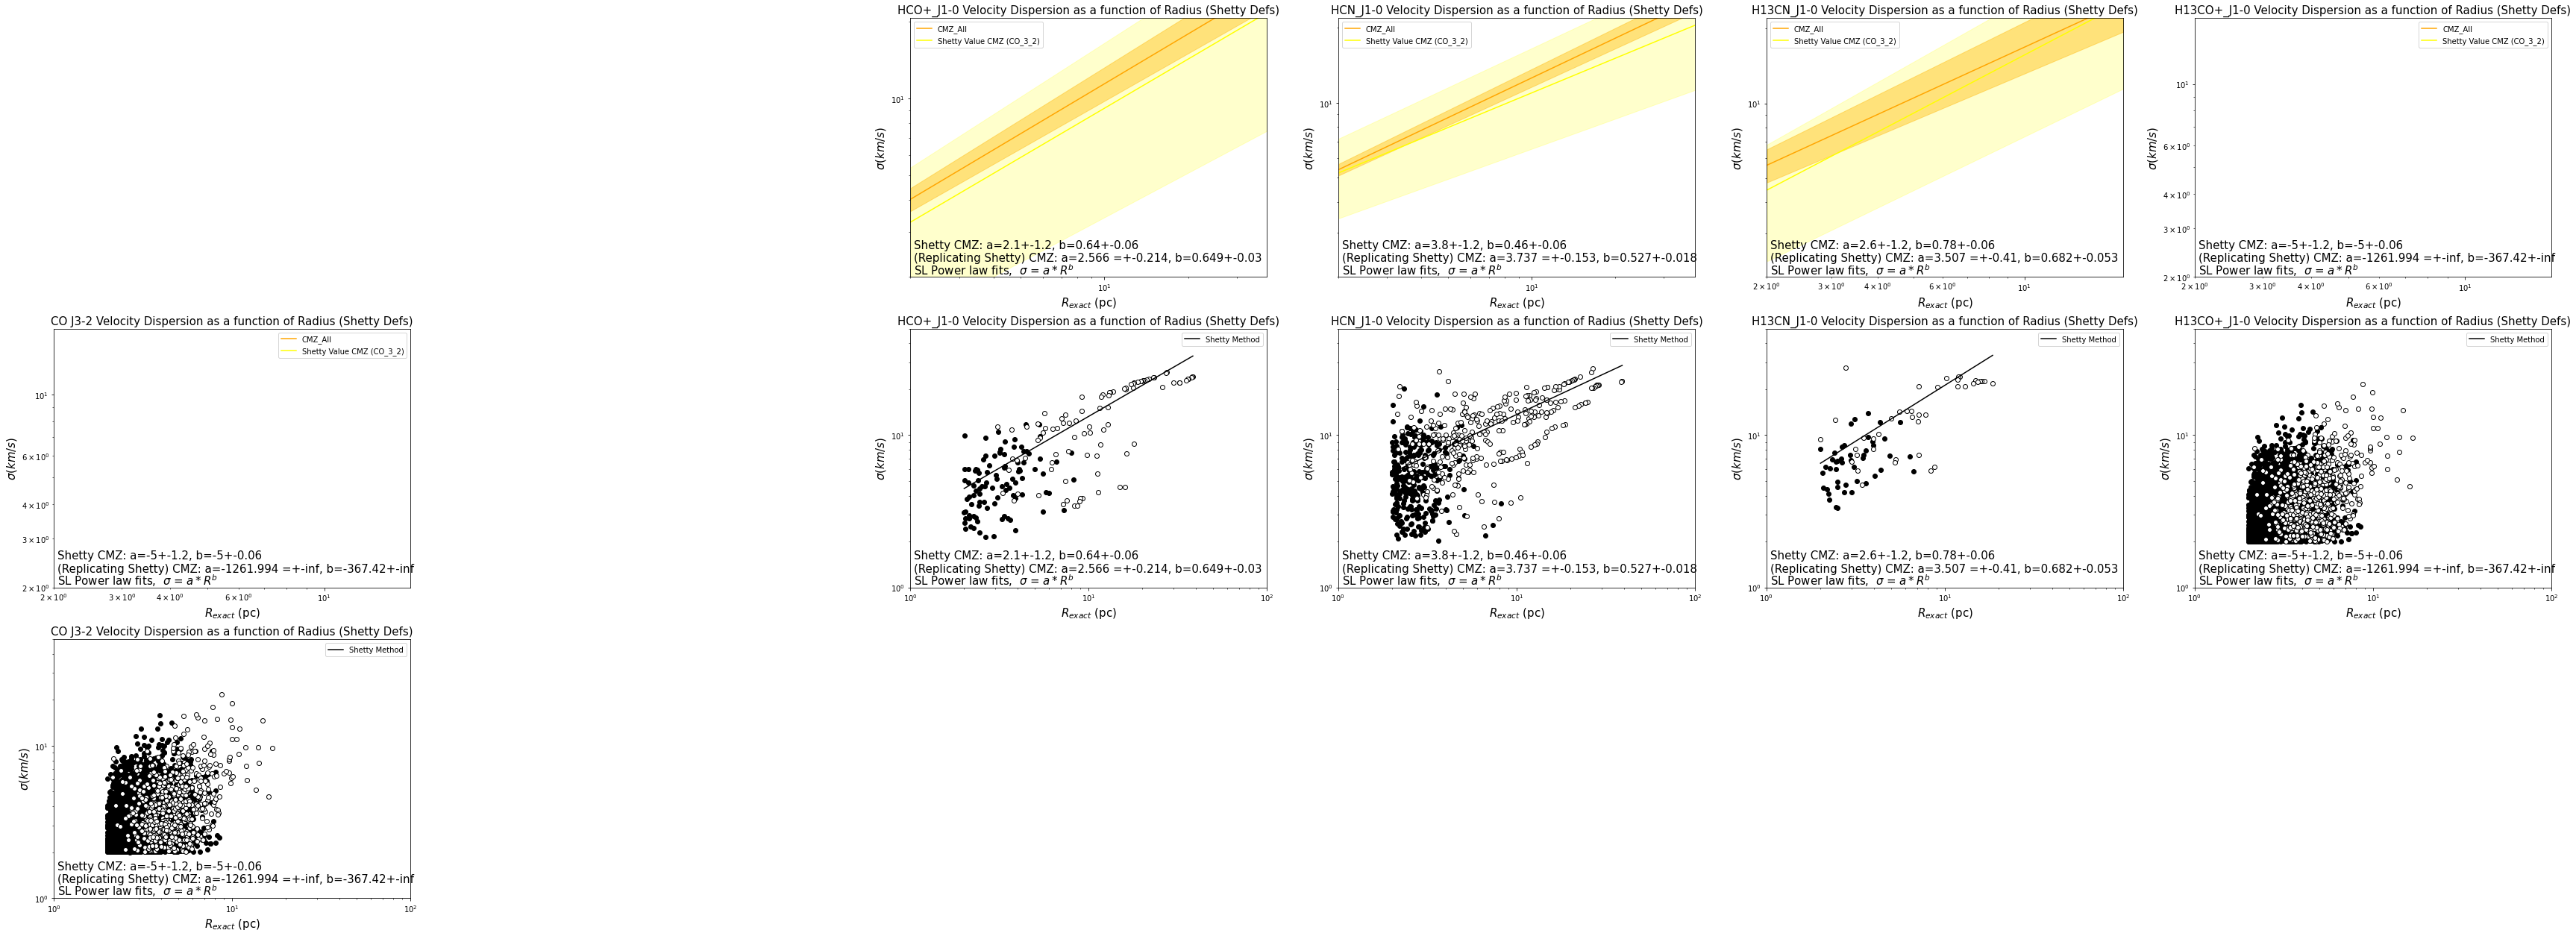

In [9]:
#Shetty comparison
Names = np.load("Names_CMZ.npy")

CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0","CO J3-2"]




#for i in range(len(RNames)):
fig = plt.figure(1,figsize=(60,60))


for i in range(0,5):

    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"

    
    #Shetty leaves/branches
    radsBaseSh=[[],[]]
    radsBaseSh[0] = np.genfromtxt(rname+"Sh_Leaves")*10**6#pc
    radsBaseSh[1] = np.genfromtxt(rname+"Sh_Branches")*10**6#pc

    #Shetty leaves/branches
    sigsBaseSh=[[],[]]
    sigsBaseSh[0] = np.genfromtxt(sname+"Sh_Leaves")#km/s
    sigsBaseSh[1] = np.genfromtxt(sname+"Sh_Branches")
   
    #Shetty's method
    radsSh,sigsSh=np.concatenate((radsBaseSh[0],radsBaseSh[1])), np.concatenate((sigsBaseSh[0],sigsBaseSh[1]))
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    
    #Sh
    (poptTSh, pcovTSh) =(curve_fit(func, radsSh,sigsSh,p0=[ShettyCoefs[i],Shetty_Exp[i]]))

    

    
    
    
    
    axSh = pylab.subplot(8,6, i+15)
    axSh2 = pylab.subplot(8,6, i+21)

    
    #sh
    xsSh=np.linspace(np.nanmin(radsSh),np.nanmax(radsSh),50)
    
    
    
    #Shettys method
    er_r=1
    ysTSh=func(xsSh,poptTSh[0],poptTSh[1])
    yusTSh  = func(xsSh, poptTSh[0]+np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]+np.sqrt(pcovTSh[1][1])*er_r)
    ylsTSh  = func(xsSh, poptTSh[0]-np.sqrt(pcovTSh[0][0])*er_r,poptTSh[1]-np.sqrt(pcovTSh[1][1])*er_r)
    xpaTSh = axSh.plot(xsSh,ysTSh,c='Orange',label='CMZ_All')
    xpaFTSh = axSh.fill_between(xsSh,ylsTSh,yusTSh,color="Orange",alpha=.4)

    
    #Shetty's methods"
    
    Shetty_Exp = [0.64,0.46,.78,-5,-5]
    Shetty_exp_errs = .06
    
    ShettyCoefs = [2.1,3.8,2.6,-5,-5]
    ShettyCoefsErrs = 1.2
    SP = func(xsSh,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(xsSh,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(xsSh,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    ShettyNM = axSh.plot(xsSh,SP,c='Yellow',label='Shetty Value CMZ (CO_3_2)')
    ShettyFill = axSh.fill_between(xsSh,SPL,SPU,color="Yellow",alpha=.2)
    
    
    
    #Shetty (data from my runs)
    #The shetty coefs and mine
    stASh= ("(Replicating Shetty) CMZ: a="+str(round(poptTSh[0],3))+" =+-" + str(round(np.sqrt(pcovTSh[0][0]),3)) +", b="+str(round(poptTSh[1],3))+"+-" + str(round(np.sqrt(pcovTSh[1][1]),3)) )
    ShstASh= ("Shetty CMZ: a="+str(round(ShettyCoefs[i],3))+"+-" + str(round(ShettyCoefsErrs,3)) +", b="+str(round(Shetty_Exp[i],3))+"+-" + str(round((Shetty_exp_errs),3)) )
    
    er_r=1
    
    
    
    xpaFTsh2 = axSh2.plot(xsSh,yusTSh,color="Black",alpha=1,label="Shetty Method")
    
    xpaFTshL = axSh2.scatter(radsBaseSh[0],sigsBaseSh[0],facecolors='Black', edgecolors='Black')
    xpaFTshB = axSh2.scatter(radsBaseSh[1],sigsBaseSh[1],facecolors='White', edgecolors='Black')
    


    axSh2.set_xlabel(r'$R_{exact}$ (pc)',fontsize=15)
    axSh2.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
    axSh2.set_yscale('log')
    axSh2.set_xscale('log')
    axSh2.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.01,0.01),xycoords="axes fraction")
    axSh2.annotate(s=stASh,fontsize=15,xy=(0.01,0.06),xycoords="axes fraction") 
    axSh2.annotate(s=ShstASh,fontsize=15,xy=(0.01,0.11),xycoords="axes fraction") 
    
    axSh2.set_xlim(1,100)
    axSh2.set_ylim(1,50)
    axSh2.set_title((CMZLs[i]+" Velocity Dispersion as a function of Radius (Shetty Defs)"), fontsize=15)
    axSh2.legend()
    #No data fit compare
    
    axSh.set_xlabel(r'$R_{exact}$ (pc)',fontsize=15)
    axSh.set_ylabel(r'$\sigma   (km/s)$',fontsize=15)
    axSh.set_yscale('log')
    axSh.set_xscale('log')
    axSh.annotate(s=r'SL Power law fits,  $\sigma$ = $a*R^b$',fontsize=15,xy=(0.01,0.01),xycoords="axes fraction")
    axSh.annotate(s=stASh,fontsize=15,xy=(0.01,0.06),xycoords="axes fraction") 
    axSh.annotate(s=ShstASh,fontsize=15,xy=(0.01,0.11),xycoords="axes fraction") 
    #axNM.set_xlim(np.nanmin(rads)*.5,np.nanmax(rads)*1)
    axSh.set_xlim(2,np.nanmax(radsSh)*1)
    axSh.set_ylim(2,np.nanmax(sigsSh)*.8)
    axSh.set_title((CMZLs[i]+" Velocity Dispersion as a function of Radius (Shetty Defs)"), fontsize=15)
    axSh.legend()
    
    

    
    
    
fig.savefig(bbox_inches='tight',fname="Benchmarking Plots.pdf")
    

['HCOp-J1_Dendrogram' 'HCN-J1_Dend_Abs' 'H13CN-J1_Abs' 'CO 3-2_Abs' '5'
 'H13COp_1_0_Abs' '7' '8' '9' 'HCOp-J4-3_Dend_Abs' 'HCN4-3_Abs'
 'CO 1-0_Abs'] ['HCOp-J1_Dendrogram', 'HCOp-J4-3_Dend_Abs', 'HCN-J1_Dend_Abs', 'HCN4-3_Abs', 'CO 3-2_Abs']


IndexError: index 5 is out of bounds for axis 0 with size 5

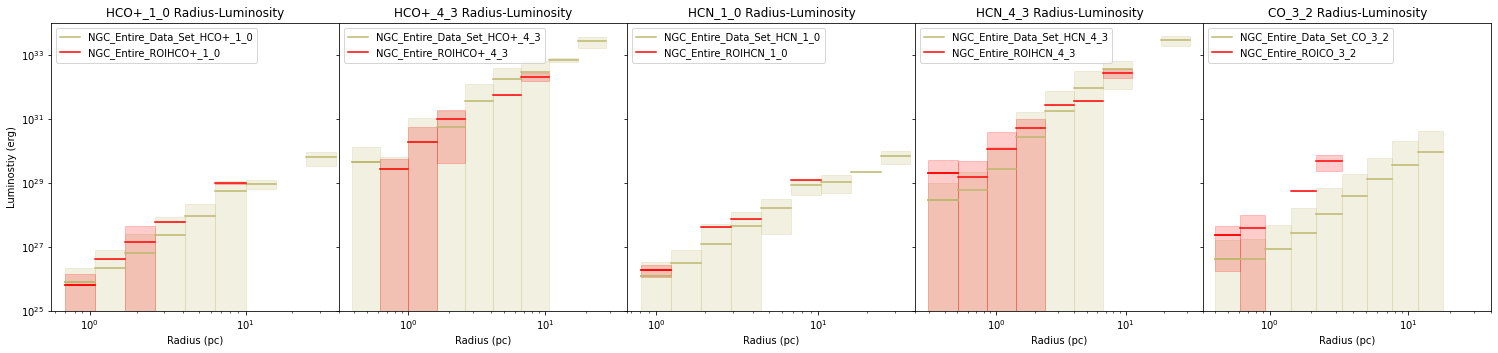

In [3]:

Names = np.load("Names_CMZ.npy")

CMZLs = ["HCO+_J1-0","HCN_J1-0","H13CN_J1-0","H13CO+_J1-0","CO_3_2"]


NGCNames = np.load("Names.npy")

NGCNamesMols = [NGCNames[0],NGCNames[1],NGCNames[2],NGCNames[5],NGCNames[3]]
print(Names,NGCNamesMols)




#for i in range(len(RNames)):
fig, axs = pylab.subplots(1, 5, figsize=(20, 4), sharey=True)
pylab.subplots_adjust(left=0.0,bottom=0.0,right=1,top=1,wspace=0.0,hspace=0.1)
for i in range(0,9):
    #make minimum space line
    er_r=1
    Nxsp=5
    resses = [4.3,3,5,3,3]
    resses=np.array(resses)/Nxsp
    
        
    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]

    
    Nminsigs=[]
    zeros=[]
    
    rs=np.linspace(0.01,10,100)
    L=np.linspace(-1,20,10)
    for t in range(100):
        try:
            Nminsigs.append(np.sqrt(np.roots([rs[t]**2,-2.5*3*resses[i]**2])[0])) #Solve for the minimum sigma value for a given radius
        except:
            Nminsigs.append(-1)
        
        line.append(rs[t])
        zeros.append(-1)
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    
    rname=Names[i]+"Radii"#.npy"
    sname=Names[i]+"Sigmas"#.npy"
    
    NGCrname=NGCNamesMols[i]+"Radii"
    NGCsname=NGCNamesMols[i]+"Sigmas"
    print(rname,NGCrname)
    #radsBase = np.load(rname,allow_pickle=True)*10**6#pc
    #radsBase = np.load(rname)*10**6#pc
    radsBase=[[],[]]
    radsBase[0] = np.genfromtxt(rname+"_Leaves")*10**6#pc
    radsBase[1] = np.genfromtxt(rname+"_Branches")*10**6#pc
    
    print(radsBase,np.shape(radsBase))

    
    
    
    sigsBase=[[],[]]
    sigsBase[0] = np.genfromtxt(sname+"_Leaves")#km/s
    sigsBase[1] = np.genfromtxt(sname+"_Branches")
    
    radsNGCBase=[[],[]]
    radsNGCBase[0] = np.genfromtxt(NGCrname+"_Leaves")*10**6#km/s
    radsNGCBase[1] = np.genfromtxt(NGCrname+"_Branches")*10**6
    
    sigsNGCBase=[[],[]]
    sigsNGCBase[0] = np.genfromtxt(NGCsname+"_Leaves")#km/s
    sigsNGCBase[1] = np.genfromtxt(NGCsname+"_Branches")
    
    
    radsNGCL=radsNGCBase[0]
    radsNGCB=radsNGCBase[1]
    sigsNGCL=sigsNGCBase[0]
    sigsNGCB=sigsNGCBase[1]
    
    radsL=radsBase[0]
    radsB=radsBase[1]
    sigsL=sigsBase[0]
    sigsB=sigsBase[1]
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    rads,sigs=np.concatenate((radsL,radsB)), np.concatenate((sigsL,sigsB))
    
    print(radsNGCBase,sigsNGCBase)
    #LuminBase = np.load(Names[i]+"_Luminosities.npy",allow_pickle=True)
    
    LuminBase=[[],[]]
    LuminBase[0] = np.genfromtxt(Names[i]+"_Luminosities"+"_Leaves")#km/s
    LuminBase[1] = np.genfromtxt(Names[i]+"_Luminosities"+"_Branches")
    
    Lumin = np.concatenate((LuminBase[0],LuminBase[1]))#Take up less ram
    
    
    LuminNGCBase=[[],[]]
    LuminNGCBase[0] = np.genfromtxt(Names[i]+"_Luminosities"+"_Leaves")#km/s
    LuminNGCBase[1] = np.genfromtxt(Names[i]+"_Luminosities"+"_Branches")
    
    
    LuminNGC = np.concatenate((LuminNGCBase[0],LuminNGCBase[1]))#Take up less ram
    
    
    
    ColumnBase=[[],[]]
    ColumnBase[0] = np.genfromtxt(Names[i]+"_Column"+"_Leaves")#km/s
    ColumnBase[1] = np.genfromtxt(Names[i]+"_Column"+"_Branches")
    
    Column = np.concatenate((ColumnBase[0],ColumnBase[1]))#Take up less ram
    
    ColumnNGCBase=[[],[]]
    ColumnNGCBase[0] = np.genfromtxt(NGCNamesMols[i]+"_Column"+"_Leaves")#km/s
    ColumnNGCBase[1] = np.genfromtxt(NGCNamesMols[i]+"_Column"+"_Branches")
        
    ColumnNGC = np.concatenate((ColumnNGCBase[0],ColumnNGCBase[1]))#Take up less ram
    
    
    Flux = np.genfromtxt(Names[i]+"Flux_Dense")#Take up less ram
    FluxNGC = np.genfromtxt(NGCNamesMols[i]+"Flux_Dense")#Take up less ram
    
    RGPFF = np.genfromtxt(Names[i]+"Rad_For_Flux")#Take up less ram
    RGPFFNGC = np.genfromtxt(NGCNamesMols[i]+"Rad_For_Flux")#Take up less ram

    
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
    
    (Npopt2, Npcov2),(NpoptT, NpcovT) = (curve_fit(func, radsNGCB, sigsNGCB)),(curve_fit(func, radsNGC,sigsNGC ))
    
    try:
        (Npopt, Npcov) = (curve_fit(func, radsNGCL, sigsNGCL))
    except:
        (Npopt, Npcov) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
    try:
        
        gp = np.where(LuminNGC>0)
        Nlgp = LuminNGC[gp]
        Nradgp = radsNGC[gp]
        #(NpoptLum, NpcovLum)  = curve_fit(func, np.array(Nradgp,dtype='float64'),np.array(Nlgp,dtype='float64'),maxfev=9999999,p0 = np.array([10**25,2],dtype='float64'),ftol = 10**-13)
    except:
        pass#(NpoptLum, NpcovLum) =[np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
        
    Rgp = np.where(LuminNGCROI>0)
    RNlgp = LuminNGCROI[Rgp]
    RNradgp = RradsNGC[Rgp]

    
    
    #axA = pylab.subplot(8,6, i+1)
    
    
    #axLum = pylab.subplot(8,6, i+25)
    
    axLum = axs[i]
    
    ######################
    ##lum
    
    
    NBin_lum=[]
    Nlum_err=[]
    NBin_rad=[]
    Nbins = np.logspace(np.log10(np.nanmin(Nradgp)),np.log10(np.nanmax(Nradgp)),10)
    Nbins=list(Nbins)
    for lmi in range(len(Nbins)-1):
        LBin=[]
        for lmj in range(len(Nradgp)):
            if(Nradgp[lmj]>Nbins[lmi] and Nradgp[lmj]<Nbins[lmi+1]):
                LBin.append(Nlgp[lmj])
        if(str(np.nanmean(LBin))!=str(np.nan) and str(np.nanmean(LBin))!= str(np.inf)):
            NBin_lum.append(np.nanmean(LBin))
            Nlum_err.append(np.nanstd(LBin))
        else:
            NBin_lum.append(np.nan)
            Nlum_err.append(np.nan)
    NBin_lum.append(np.nan)
    Nlum_err.append(np.nan)#get right shapes
    
    bw = (Nbins[0+1]-Nbins[0])
    Nxp1BinC = axLum.plot([Nbins[0],Nbins[1]], [NBin_lum[0],NBin_lum[0]],c="darkkhaki",alpha=1,label=("NGC_Entire_Data_Set_"+CMZLs[i]))
    for w in range(len(Nbins)-1):
        bw = (Nbins[w+1]-Nbins[w])
        Nxp1BinC = axLum.plot([Nbins[w],Nbins[w+1]], [NBin_lum[w],NBin_lum[w]],c="darkkhaki",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axLum.add_patch(Rectangle(
            xy=(Nbins[w], NBin_lum[w]-Nlum_err[w]*er_r) ,width=bw, height=Nlum_err[w]*er_r*2,
            linewidth=1, color='darkkhaki', fill=True,alpha=.2,))
        
        
        
    RNBin_lum=[]
    RNlum_err=[]
    RNBin_rad=[]
    RNbins=list(Nbins)
    for lmi in range(len(RNbins)-1):
        RLBin=[]
        for lmj in range(len(RNradgp)):
            if(RNradgp[lmj]>RNbins[lmi] and RNradgp[lmj]<RNbins[lmi+1]):
                RLBin.append(RNlgp[lmj])
        if(str(np.nanmean(RLBin))!=str(np.nan) and str(np.nanmean(RLBin))!= str(np.inf)):
            RNBin_lum.append(np.nanmean(RLBin))
            RNlum_err.append(np.nanstd(RLBin))
        else:
            RNBin_lum.append(np.nan)
            RNlum_err.append(np.nan)
    RNBin_lum.append(np.nan)
    RNlum_err.append(np.nan)#get right shapes
    
    bw = (RNbins[0+1]-RNbins[0])
    RNxp1BinC = axLum.plot([RNbins[0],RNbins[1]], [RNBin_lum[0],RNBin_lum[0]],c="red",alpha=1,label=("NGC_Entire_ROI"+CMZLs[i]))
    for w in range(len(RNbins)-1):
        bw = (RNbins[w+1]-RNbins[w])
        RNxp1BinC = axLum.plot([RNbins[w],RNbins[w+1]], [RNBin_lum[w],RNBin_lum[w]],c="red",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axLum.add_patch(Rectangle(
            xy=(RNbins[w], RNBin_lum[w]-RNlum_err[w]*er_r) ,width=bw, height=RNlum_err[w]*er_r*2,
            linewidth=1, color='red', fill=True,alpha=.2,))
        
    er_r = 2  
    
    ##########
    #print(xs,Nxs,yusLum)
    if(i==1):
        percent = 1
    else:
        percent = 1
    Nxp1AL = axA.scatter(radsNGCL[0:int((len(radsNGCL)-1)*percent)], sigsNGCL[0:int((len(sigsNGCL)-1)*percent)],c="Orange",alpha=.7,label=("NGC_253_Leaves"+CMZLs[i]),marker='o',s=10,facecolors='none')
    Nxp1AB = axA.scatter(radsNGCB[0:int((len(radsNGCB)-1)*percent)], sigsNGCB[0:int((len(sigsNGCB)-1)*percent)],c="Crimson",alpha=.7,label=("NGC_253_Branches"+CMZLs[i]),marker='o',s=10,facecolors='black')
    
    
    NysT=func(Nxs,NpoptT[0],NpoptT[1])
    NxpaT=axA.plot(Nxs,NysT,c='Red',label='NGC_All')
    
    er_r=2
    NyusT  = func(Nxs, NpoptT[0]+np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]+np.sqrt(NpcovT[1][1])*er_r)
    NylsT  = func(Nxs, NpoptT[0]-np.sqrt(NpcovT[0][0])*er_r,NpoptT[1]-np.sqrt(NpcovT[1][1])*er_r)
    NxpaFT = axA.fill_between(Nxs,NylsT,NyusT,color="Red",alpha=.4)
   

    
    if i==0:
        
        axLum.set_ylabel("Luminostiy (erg)")
    axLum.set_xlabel("Radius (pc)")

    axLum.set_yscale('log')
    axLum.set_xscale('log')
  
    
    axLum.set_xlim(0,40)
    axLum.set_ylim(10.0**25,10.0**34)

    

    axLum.legend(loc='upper left')
    
    axLum.title.set_text((CMZLs[i]+" Radius-Luminosity"))

      
    
fig.savefig(bbox_inches='tight',fname="Comparison Plots_Alpha.jpeg")


['HCOp-J1_Dendrogram' 'HCN-J1_Dend_Abs' 'H13CN-J1_Abs' 'CO 3-2_Abs' '5'
 'H13COp_1_0_Abs' '7' '8' '9' 'HCOp-J4-3_Dend_Abs' 'HCN4-3_Abs'
 'CO 1-0_Abs'] ['HCOp-J1_Dendrogram', 'HCOp-J4-3_Dend_Abs', 'HCN-J1_Dend_Abs', 'HCN4-3_Abs', 'CO 3-2_Abs']
[0.8095938737878086, 1.077444391096948, 1.433912055775433, 1.9083154552457278, 2.539673100635424, 3.3799126032129796, 4.498141592514293, 5.986331648656554, 7.966882738272368, 10.602690310288164, 14.110543045378922, 24.991885983082533, 33.260339841040185] [3.8370929149133115, 4.347504392911396, 5.326714179219364, 6.87386885024253, 9.936442870917958, 12.505435394960289, 13.18700000619848, 16.30950067979555, 20.70024072110234, 25.861793476589643, 23.63862802214444, 48.8452915566686, 59.88093250159529]
0.6005012833412945
[0.4589502662054167, 0.6224916616893962, 0.8443090622359298, 1.1451684198292265, 1.5532353831442267, 2.1067120902713716, 2.8574135507467098, 3.8756184282111312, 5.256648341002138, 7.129791617209021, 9.670406922281003, 13.1163398684445

IndexError: index 5 is out of bounds for axis 0 with size 5

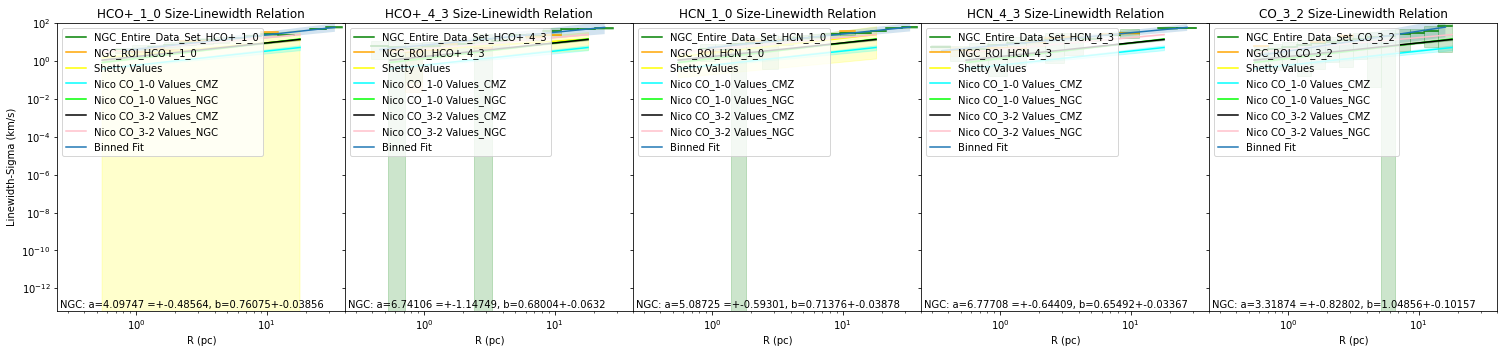

In [3]:



CMZLs = ["HCO+_1_0","HCO+_4_3","HCN_1_0",'HCN_4_3',"CO_3_2"]


NGCNames = np.load("Names.npy")


#ONGCR = [NGCRNames[9],NGCRNames[10],NGCRNames[8],NGCRNames[5]]
#ONGCS = [NGCSNames[9],NGCSNames[10],NGCSNames[8],NGCSNames[5]]
NGCNamesMols = [NGCNames[0],NGCNames[9],NGCNames[1],NGCNames[10],NGCNames[3]]
print(NGCNames,NGCNamesMols )





#for i in range(len(RNames)):
fig, axs = pylab.subplots(1, 5, figsize=(20, 4), sharey=True)
pylab.subplots_adjust(left=0.0,bottom=0.0,right=1,top=1,wspace=0.0,hspace=0.1)


for i in range(0,9):
    #make minimum space line

    Nxsp=5
    resses = [5,3,5,3,3]
    resses=np.array(resses)/Nxsp
    
        
    xsps=[]

    ysps=[]

    line=[]
    minsigs=[]
    Nxsps=[]

    Nysps=[]

    
    Nminsigs=[]
    zeros=[]
    
    rs=np.linspace(0.05,10,100)
    L=np.linspace(-1,20,10)
    for t in range(100):
        
        Nminsigs.append(np.roots([rs[t]**2,-2.5*3*resses[i]**2])[0]) #Solve for the minimum sigma value for a given radius
        
        
        line.append(rs[t])
        zeros.append(-1)
    
    #print(RNames,SNames,CMZLs,NGCRNames,NGCSNames)
    
    NGCrname=NGCNamesMols[i]+"Radii.npy"
    NGCsname=NGCNamesMols[i]+"Sigmas.npy"
    
    
    radsNGCBase = np.load(NGCrname,allow_pickle=True)*10**6
    sigsNGCBase = np.load(NGCsname,allow_pickle=True)
    RradsNGCBase = np.load(NGCNamesMols[i]+"Radii"+"_ROI.npy",allow_pickle=True)*10**6
    RsigsNGCBase = np.load(NGCNamesMols[i]+"Sigmas"+"_ROI.npy",allow_pickle=True)
    
    radsNGCL=radsNGCBase[0]
    radsNGCB=radsNGCBase[1]
    sigsNGCL=sigsNGCBase[0]
    sigsNGCB=sigsNGCBase[1]
    
    radsNGC=np.concatenate((radsNGCL,radsNGCB))
    sigsNGC = np.concatenate((sigsNGCL,sigsNGCB))
    
    RradsNGC=np.concatenate((RradsNGCBase[0],RradsNGCBase[1]))
    RsigsNGC = np.concatenate((RsigsNGCBase[0],RsigsNGCBase[1]))
    
    from scipy.optimize import curve_fit
    
    def func(R,a,b):
        return a*R**(b)
    #print(Bin_Rads,Bin_Sigs)
  
    #axA = pylab.subplot(8,6, i+1)
    
    
    #axLum = pylab.subplot(8,6, i+25)
    
    axA=axs[i]
    
    ######################
    ##lum
    
    
    NBin_s=[]
    Ns_err=[]
    NBin_rad=[]
    Nbins = np.logspace(np.log10(np.nanmin(radsNGC)),np.log10(np.nanmax(radsNGC)),15)
    Nbins=list(Nbins)
    for lmi in range(len(Nbins)-1):
        SBin=[]
        for lmj in range(len(radsNGC)):
            if(radsNGC[lmj]>Nbins[lmi] and radsNGC[lmj]<Nbins[lmi+1]):
                SBin.append(sigsNGC[lmj])
        if(str(np.nanmean(SBin))!=str(np.nan) and str(np.nanmean(SBin))!= str(np.inf)):
            #NBin_s.append(np.nanmean(SBin))
            NBin_s.append(np.nanmean(SBin))
            Ns_err.append(np.nanstd(SBin))
            
        else:
            NBin_s.append(np.nan)
            Ns_err.append(np.nan)
            
            #NBin_s.append(SBin)
            #Ns_err.append(0)
    NBin_s.append(np.nan)
    Ns_err.append(np.nan)#get right shapes
    
    bw = (Nbins[0+1]-Nbins[0])
    Nxp1BinC = axA.plot([Nbins[0],Nbins[1]], [NBin_s[0],NBin_s[0]],c="green",alpha=1,label=("NGC_Entire_Data_Set_"+CMZLs[i]))
    for w in range(len(Nbins)-1):
        bw = (Nbins[w+1]-Nbins[w])
        Nxp1BinC = axA.plot([Nbins[w],Nbins[w+1]], [NBin_s[w],NBin_s[w]],c="green",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axA.add_patch(Rectangle(
            xy=(Nbins[w], NBin_s[w]-Ns_err[w]*er_r) ,width=bw, height=Ns_err[w]*er_r*2,
            linewidth=1, color='green', fill=True,alpha=.2,))
    
    RNBin_s=[]
    RNs_err=[]
    RNBin_rad=[]
    
    
    RNbins=list(Nbins)
    for lmi in range(len(RNbins)-1):
        SBin=[]
        for lmj in range(len(RradsNGC)):
            if(RradsNGC[lmj]>RNbins[lmi] and RradsNGC[lmj]<RNbins[lmi+1]):
                SBin.append(RsigsNGC[lmj])
        if(str(np.nanmean(SBin))!=str(np.nan) and str(np.nanmean(SBin))!= str(np.inf)):
            #RNBin_s.append(np.nanmean(SBin))
            RNBin_s.append(np.nanmean(SBin))
            RNs_err.append(np.nanstd(SBin))
        else:
            RNBin_s.append(np.nan)
            RNs_err.append(np.nan)
            #RNBin_s.append(SBin)
            #RNs_err.append(0)
    RNBin_s.append(np.nan)
    RNs_err.append(np.nan)#get right shapes
    
    bw = (RNbins[0+1]-RNbins[0])
    RNxp1BinC = axA.plot([RNbins[0],RNbins[1]], [RNBin_s[0],RNBin_s[0]],c="orange",alpha=1,label=("NGC_ROI_"+CMZLs[i]))
    for w in range(len(RNbins)-1):
        bw = (RNbins[w+1]-RNbins[w])
        RNxp1BinC = axA.plot([RNbins[w],RNbins[w+1]], [RNBin_s[w],RNBin_s[w]],c="orange",alpha=1)
        #Nerr_tipsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]+NSL_err[w]*er_r,NBin_SL[w]+NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        #Nerr_tupsC = axCol.plot([Nbins[w]-bw/2,Nbins[w]+bw/2], [NBin_SL[w]-NSL_err[w]*er_r,NBin_SL[w]-NSL_err[w]*er_r],c="darkkhaki",alpha=1)
        axA.add_patch(Rectangle(
            xy=(RNbins[w], RNBin_s[w]-RNs_err[w]*er_r) ,width=bw, height=RNs_err[w]*er_r*2,
            linewidth=1, color='orange', fill=True,alpha=.2,))        
    er_r = 2  
    

   
    if(i==0):
        
        axA.set_ylabel("Linewidth-Sigma (km/s)")
    
    #Fit to bin centers and median sigma
    Bin_Centers=[]
    def func(R,a,b):
        return a*R**(b)
    for lmi in range(len(Nbins)-1):
        Bin_Centers.append((Nbins[lmi]+Nbins[lmi+1])/2)
        
    #REmove nan in the sigma bins
    
    del NBin_s[len(NBin_s)-1]
    for lmi in range(len(Nbins)-1):
        if(lmi>len(NBin_s)-1):
            break
        #print(lmi,len(NBin_s),len(Bin_Centers))
        if(str(NBin_s[lmi])==str(np.nan)):
            del NBin_s[lmi]
            del Bin_Centers[lmi]
    print(Bin_Centers, NBin_s)
    (popt, pcov) = (curve_fit(func, Bin_Centers, NBin_s))
    
    
    #Compare to nico and shetty
    Shetty_Exp = [0.64,0.46,.78,-5,-5]
    Shetty_exp_errs = .06
    ShettyCoefs = [2.1,3.8,2.6,-5,-5]
    ShettyCoefsErrs = 1.2
    SP = func(Nxs,ShettyCoefs[i],Shetty_Exp[i])
    SPU = func(Nxs,ShettyCoefs[i]+ShettyCoefsErrs*er_r,Shetty_Exp[i] + Shetty_exp_errs*er_r)
    SPL = func(Nxs,ShettyCoefs[i]-ShettyCoefsErrs*er_r,Shetty_Exp[i] - Shetty_exp_errs*er_r)
    ShettyNM = axA.plot(Nxs,SP,c='Yellow',label='Shetty Values')
    ShettyFill = axA.fill_between(Nxs,SPL,SPU,color="Yellow",alpha=.2)
    NicoCO = .74
    NicoCOErr=.04
    NicoCO_10= 3.3
    NicoCO_10Err= .4
    def NicoCOCoef(sig10,exp):
        return sig10/10**exp
    def NicoAErr(Aer,b,bErr):
        return np.sqrt(Aer**2/10**(2*b)+b**2*Aer**2*bErr**2/b**(2*b+2))
    NNicoCO = .82
    NNicoCOErr=.02
    NNicoCO_10= 8.9
    NNicoCO_10Err= .2
    print(NicoCOCoef(NicoCO_10,NicoCO))
    NI = func(Nxs,NicoCOCoef(NicoCO_10,NicoCO),NicoCO)
    NIU = func(Nxs,NicoCOCoef(NicoCO_10+NicoCO_10Err*er_r,NicoCO+NicoCOErr*er_r),NicoCO+ NicoCOErr*er_r)
    NIL = func(Nxs,NicoCOCoef(NicoCO_10-NicoCO_10Err*er_r,NicoCO-NicoCOErr*er_r),NicoCO- NicoCOErr*er_r)
    NicoNM = axA.plot(Nxs,NI,c='Cyan',label='Nico CO_1-0 Values_CMZ')
    NicoFill = axA.fill_between(Nxs,NIL,NIU,color="Cyan",alpha=.2)
    NNI = func(Nxs,NicoCOCoef(NNicoCO_10,NNicoCO),NNicoCO)
    NNIU = func(Nxs,NicoCOCoef(NNicoCO_10+NNicoCO_10Err*er_r,NNicoCO+NNicoCOErr*er_r),NNicoCO+ NNicoCOErr*er_r)
    NNIL = func(Nxs,NicoCOCoef(NNicoCO_10-NNicoCO_10Err*er_r,NNicoCO-NNicoCOErr*er_r),NNicoCO- NNicoCOErr*er_r)
    NNicoNM = axA.plot(Nxs,NNI,c='lime',label='Nico CO_1-0 Values_NGC')
    NNicoFill = axA.fill_between(Nxs,NNIL,NNIU,color="lime",alpha=.2)
    NicoCO32 = .72
    NicoCOErr32=.03
    NicoCO_32= 8.9
    NicoCO_32Err= .2
    NNicoCO32 = .62
    NNicoCOErr32=.01
    NNicoCO_32=17.1
    NNicoCO_32Err= .01
    
    NI32 = func(Nxs,NicoCOCoef(NicoCO_32,NicoCO32),NicoCO32)
    NIU32 = func(Nxs,NicoCOCoef(NicoCO_32+NicoCO_32Err*er_r,NicoCO32+NicoCOErr32*er_r),NicoCO32+ NicoCOErr32*er_r)
    NIL32 = func(Nxs,NicoCOCoef(NicoCO_32-NicoCO_32Err*er_r,NicoCO32-NicoCOErr32*er_r),NicoCO32- NicoCOErr32*er_r)
    
    NicoNM32 = axA.plot(Nxs,NI32,c='black',label='Nico CO_3-2 Values_CMZ')
    NicoFill32 = axA.fill_between(Nxs,NIL32,NIU32,color="black",alpha=.2)
    
    NNI32 = func(Nxs,NicoCOCoef(NNicoCO_32,NNicoCO32),NNicoCO32)
    NNIU32 = func(Nxs,NicoCOCoef(NNicoCO_32+NNicoCO_32Err*er_r,NNicoCO32+NNicoCOErr32*er_r),NNicoCO32+ NNicoCOErr32*er_r)
    NNIL32 = func(Nxs,NicoCOCoef(NNicoCO_32-NNicoCO_32Err*er_r,NNicoCO32-NNicoCOErr32*er_r),NNicoCO32- NNicoCOErr32*er_r)
    
    NNicoNM32 = axA.plot(Nxs,NNI32,c='pink',label='Nico CO_3-2 Values_NGC')
    NNicoFill32 = axA.fill_between(Nxs,NNIL32,NNIU32,color="pink",alpha=.2)
    
    
    axA.plot(Bin_Centers,func(Bin_Centers,popt[0],popt[1]),label="Binned Fit")
    axA.fill_between(Bin_Centers,func(Bin_Centers,popt[0]+np.sqrt(pcov[0][0])*er_r,popt[1]+np.sqrt(pcov[1][1])*er_r),func(Bin_Centers,popt[0]-np.sqrt(pcov[0][0])*er_r,popt[1]-np.sqrt(pcov[1][1])*er_r),alpha=.2)
    axA.set_xlabel("R (pc)")
    axA.set_yscale('log')
    axA.set_xscale('log')
    string = ("NGC: a="+str(round(popt[0],3))+" =+-" + str(round(np.sqrt(pcov[0][0]),3)) +", b="+str(round(popt[1],3))+"+-" + str(round(np.sqrt(pcov[1][1]),3)) )
    
    axA.annotate(s=string,fontsize=15,xy=(0.45,.01),xycoords="axes fraction")
    axA.set_xlim(np.nanmin(radsNGC)*.5,np.nanmax(radsNGC)*1.1)
    axA.set_ylim(np.nanmin(sigsNGC)*.9,np.nanmax(sigsNGC)*1.4)

    axA.set_xlim(.25,40)
    axA.set_ylim(0,100)

    axA.legend(loc='upper left')

   
    axA.title.set_text((CMZLs[i]+" Size-Linewidth Relation"))
     
    
fig.savefig(bbox_inches='tight',fname="Comparison Plots_2.jpeg")
